Цель проекта - провести глубокий анализ данных, сформулировать и проверить гипотезы, опираясь на доступные признаки.

     Задачи:
     
- Провести исследовательский анализ данных о ДТП.

- Сформулировать и проверить не менее трех гипотез, основываясь на имеющихся признаках.

- Построить дашборд используя любой удобный инструмент, с учетом того, что дашборд может быть опубликован


# Чтение данных и их предобработка

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from tqdm import tqdm
import os
from scipy.stats import kendalltau
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import json
import numpy as np
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('merged_data.csv')

In [4]:
df.head()

,id,tags,light,point,nearby,region,scheme,address,weather,category,...,severity,vehicles,dead_count,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories,geometry
0,2869171,['Дорожно-транспортные происшествия'],Светлое время суток,"{'lat': 53.3912, 'long': 83.7879}",['Жилые дома индивидуальной застройки'],Барнаул,830.0,NaN,['Ясно'],Наезд на пешехода,...,Легкий,"[ { ""year"": 2015, ""brand"": ""Прочие марки ТС"", ...",0,"[ { ""role"": ""Пешеход"", ""gender"": ""Мужской"", ""v...",1,Алтайский край,['Сухое'],2,"['Все участники', 'Пешеходы', 'Мотоциклисты']",POINT (83.7879 53.3912)
1,2320091,"['Дорожно-транспортные происшествия', 'ДТП и п...",Светлое время суток,"{'lat': 53.345833, 'long': 83.666389}","['Многоквартирные жилые дома', 'Внутридворовая...",Барнаул,880.0,"г Барнаул, ул Сиреневая, 11",['Пасмурно'],Иной вид ДТП,...,Легкий,"[ { ""year"": 2002, ""brand"": ""TOYOTA"", ""color"": ...",0,[ ],1,Алтайский край,['Сухое'],2,"['Дети', 'Все участники']",POINT (83.666389 53.345833)
2,2321011,"['Дорожно-транспортные происшествия', 'ДТП и п...",Светлое время суток,"{'lat': 53.19706, 'long': 83.39688}","['Административные здания', 'Остановка обществ...",Барнаул,960.0,"г Барнаул, ул Попова, 165",['Ясно'],Падение пассажира,...,Легкий,"[ { ""year"": 1981, ""brand"": ""DAIMLER"", ""color"":...",0,[ ],1,Алтайский край,['Сухое'],3,"['Дети', 'Все участники']",POINT (83.39688 53.19706)
3,2576909,['Дорожно-транспортные происшествия'],Светлое время суток,"{'lat': 53.3764, 'long': 83.7142}","['Выезд с прилегающей территории', 'Администра...",Барнаул,130.0,"г Барнаул, ул Петра Сухова, 83 А",['Ясно'],Столкновение,...,Тяжёлый,"[ { ""year"": 2001, ""brand"": ""HONDA"", ""color"": ""...",0,[ ],1,Алтайский край,"['Сухое', 'Отсутствие, плохая различимость гор...",3,"['Мотоциклисты', 'Все участники']",POINT (83.7142 53.3764)
4,2575209,['Дорожно-транспортные происшествия'],Светлое время суток,"{'lat': 53.343071, 'long': 83.794366}","['Многоквартирные жилые дома', 'Жилые дома инд...",Барнаул,500.0,"г Барнаул, ул Партизанская, 26",['Ясно'],Столкновение,...,Легкий,"[ { ""year"": 2014, ""brand"": ""NISSAN"", ""color"": ...",0,[ ],1,Алтайский край,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники'],POINT (83.794366 53.343071)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411646 entries, 0 to 1411645
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1411646 non-null  int64  
 1   tags                    1411646 non-null  object 
 2   light                   1411646 non-null  object 
 3   point                   1411646 non-null  object 
 4   nearby                  1411646 non-null  object 
 5   region                  1411646 non-null  object 
 6   scheme                  1330168 non-null  float64
 7   address                 1344868 non-null  object 
 8   weather                 1411646 non-null  object 
 9   category                1411646 non-null  object 
 10  datetime                1411646 non-null  object 
 11  severity                1411646 non-null  object 
 12  vehicles                1411646 non-null  object 
 13  dead_count              1411646 non-null  int64  
 14  pa

In [6]:
len(df)

1411646

In [7]:
df.columns

Index(['id', 'tags', 'light', 'point', 'nearby', 'region', 'scheme', 'address',
       'weather', 'category', 'datetime', 'severity', 'vehicles', 'dead_count',
       'participants', 'injured_count', 'parent_region', 'road_conditions',
       'participants_count', 'participant_categories', 'geometry'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().mean().sort_values(ascending=False)

scheme                    0.057718
address                   0.047305
geometry                  0.007611
vehicles                  0.000000
participant_categories    0.000000
participants_count        0.000000
road_conditions           0.000000
parent_region             0.000000
injured_count             0.000000
participants              0.000000
dead_count                0.000000
id                        0.000000
severity                  0.000000
tags                      0.000000
category                  0.000000
weather                   0.000000
region                    0.000000
nearby                    0.000000
point                     0.000000
light                     0.000000
datetime                  0.000000
dtype: float64

In [10]:
pd.DataFrame(df.isna().mean().to_frame(name='Пропуски').query('Пропуски > 0')['Пропуски'])\
            .style.background_gradient('coolwarm')\
            .format({'Пропуски':'{:.0%}'})

,Пропуски
scheme,6%
address,5%
geometry,1%


Оставлю актуальный период

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df = df[df['year'] > 2020]
df.loc[:, 'month'] = df['datetime'].dt.month

In [12]:
len(df)

406759

# Исследовательский анализ

Распределение категорий ДТП

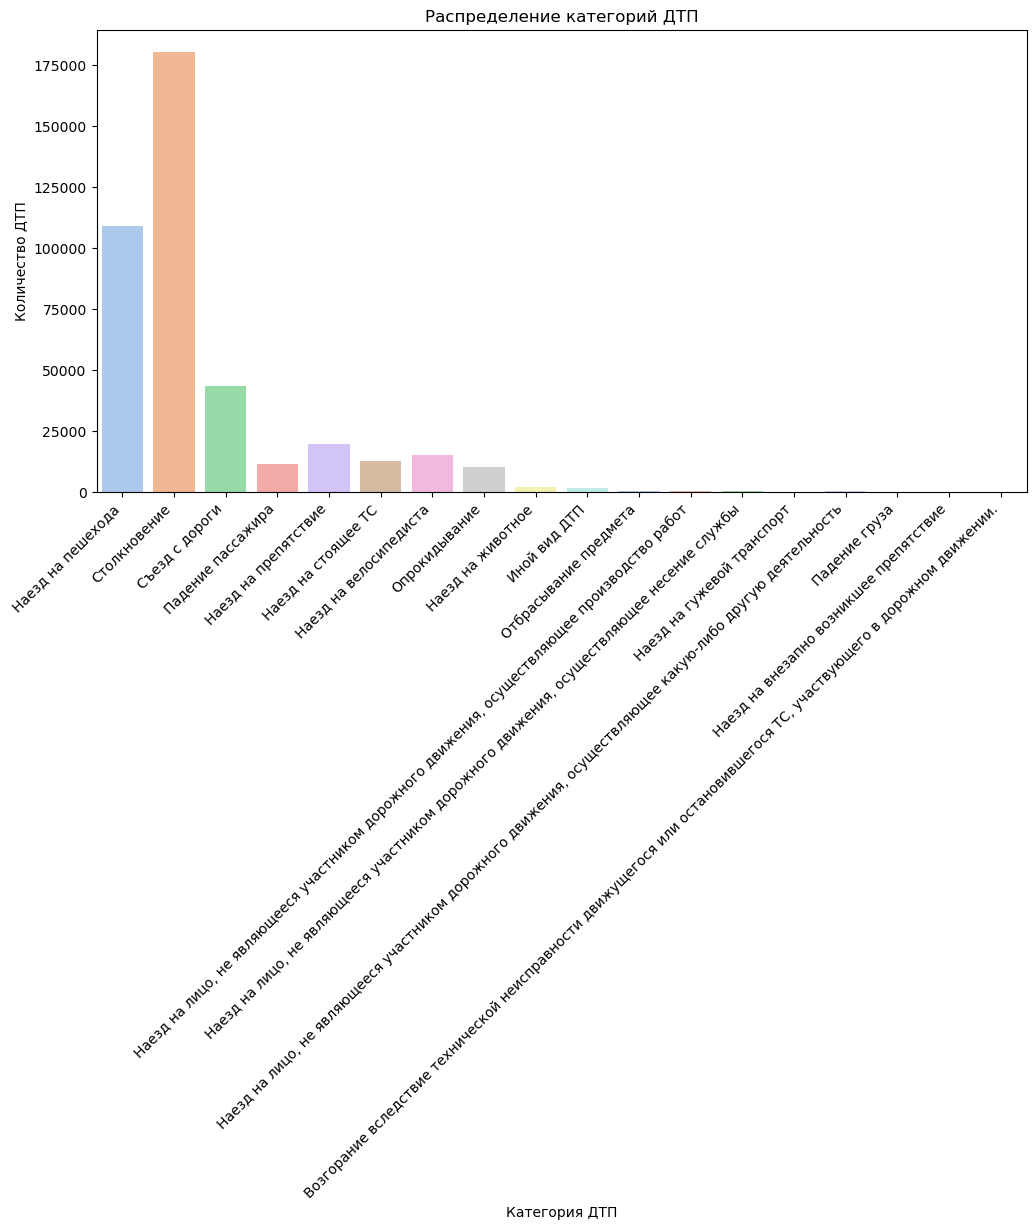

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, palette='pastel')
plt.title('Распределение категорий ДТП')
plt.xlabel('Категория ДТП')
plt.ylabel('Количество ДТП')
plt.xticks(rotation=45, ha='right')
plt.show()

Столбчатая диаграмма среднего количества пострадавших и погибших в зависимости от тяжести ДТП:

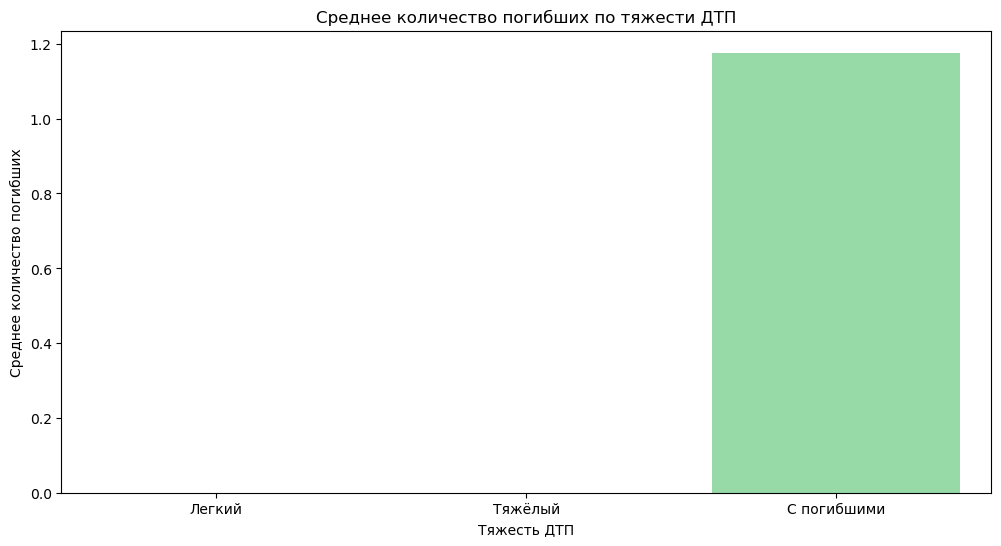

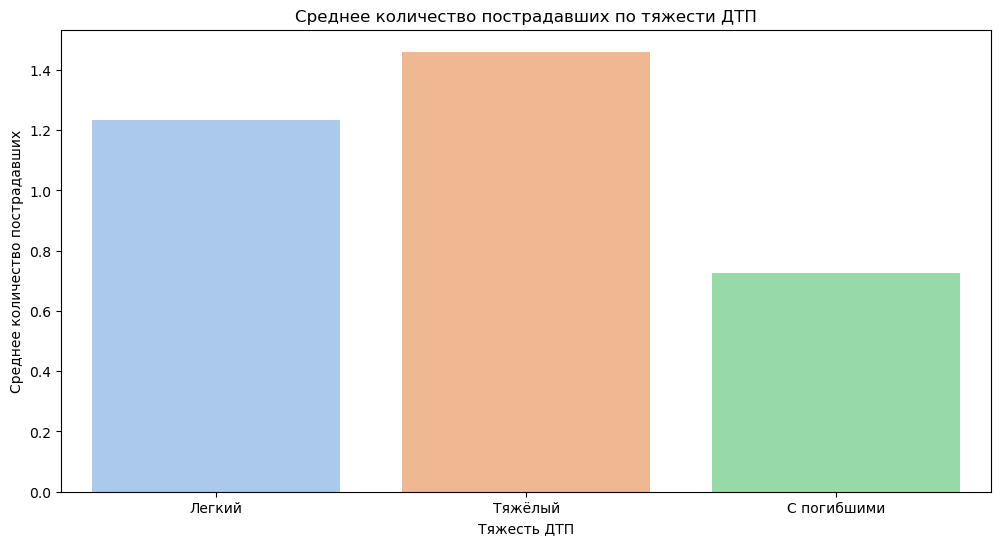

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='severity', y='dead_count', data=df, palette='pastel', ci=None)
plt.title('Среднее количество погибших по тяжести ДТП')
plt.xlabel('Тяжесть ДТП')
plt.ylabel('Среднее количество погибших')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='severity', y='injured_count', data=df, palette='pastel', ci=None)
plt.title('Среднее количество пострадавших по тяжести ДТП')
plt.xlabel('Тяжесть ДТП')
plt.ylabel('Среднее количество пострадавших')
plt.show()

Распределение числа участников в ДТП:

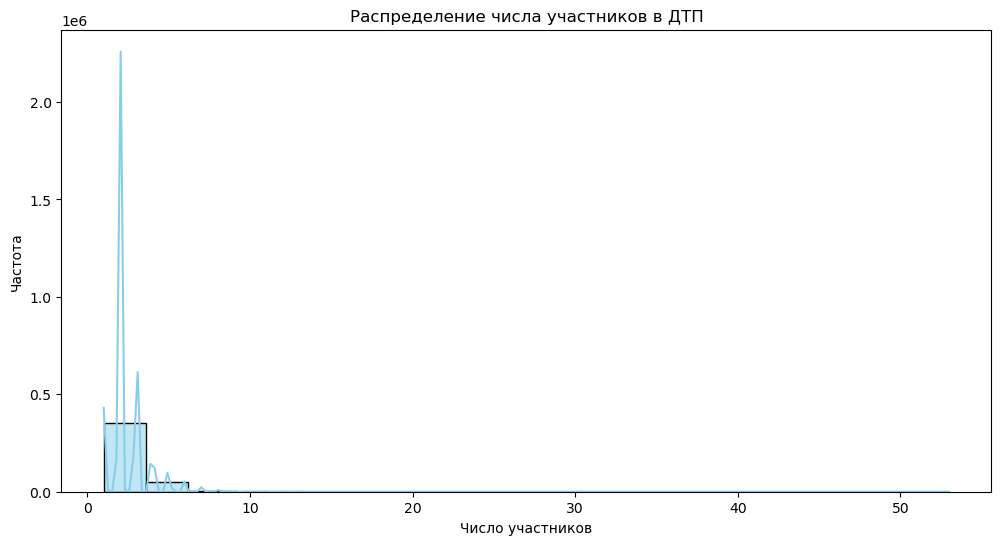

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['participants_count'], bins=20, kde=True, color='skyblue')
plt.title('Распределение числа участников в ДТП')
plt.xlabel('Число участников')
plt.ylabel('Частота')
plt.show()

Зависимость числа погибших и пострадавших от числа участников:

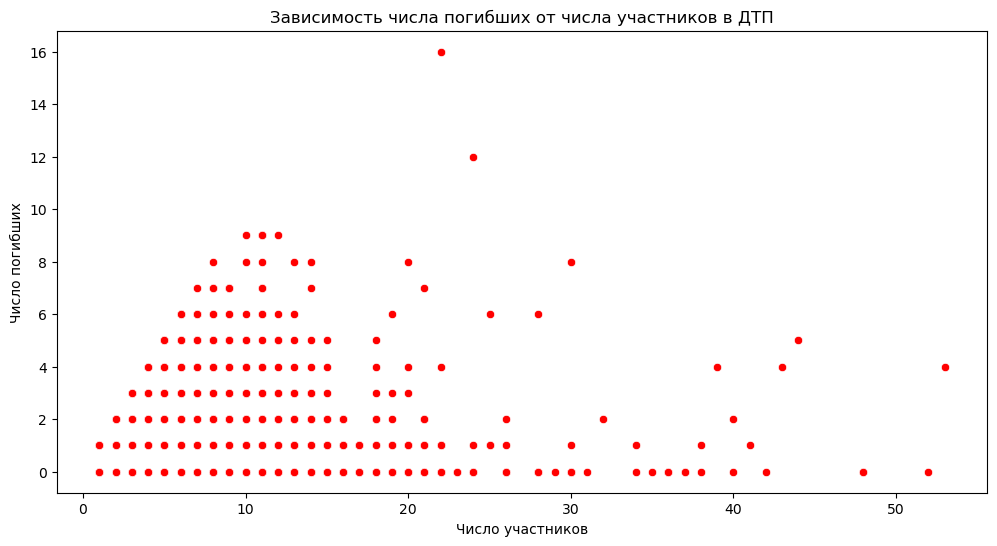

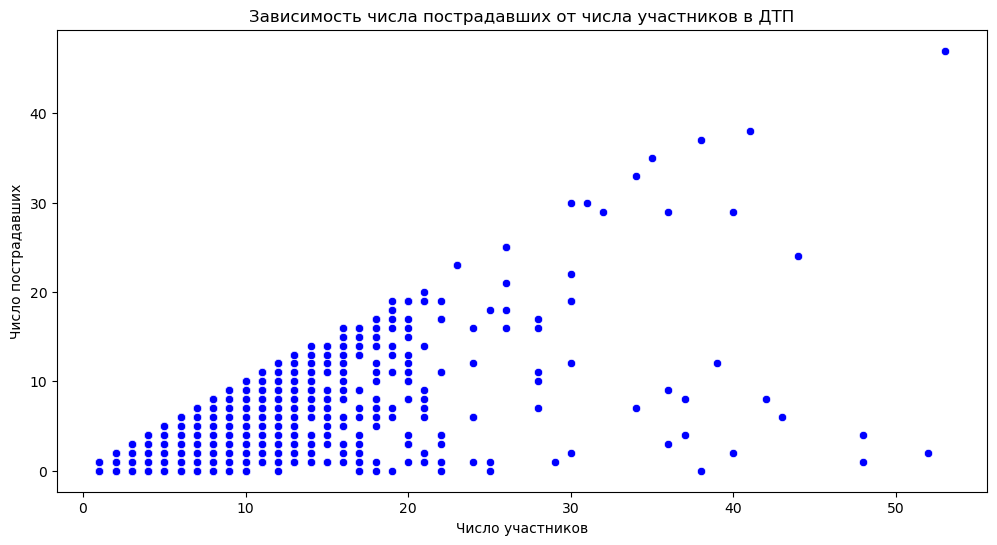

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='participants_count', y='dead_count', data=df, color='red')
plt.title('Зависимость числа погибших от числа участников в ДТП')
plt.xlabel('Число участников')
plt.ylabel('Число погибших')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='participants_count', y='injured_count', data=df, color='blue')
plt.title('Зависимость числа пострадавших от числа участников в ДТП')
plt.xlabel('Число участников')
plt.ylabel('Число пострадавших')
plt.show()


In [17]:
df.describe().round(3)

,id,scheme,dead_count,injured_count,participants_count,year,month
count,406759.000,387101.000,406759.000,406759.000,406759.000,406759.000,406759.000
mean,2738499.317,518.061,0.111,1.255,2.495,2022.058,6.712
std,120520.307,305.524,0.382,0.870,1.219,0.893,3.381
min,2531751.000,10.000,0.000,0.000,1.000,2021.000,1.000
25%,2634256.500,200.000,0.000,1.000,2.000,2021.000,4.000
50%,2737126.000,600.000,0.000,1.000,2.000,2022.000,7.000
75%,2842826.500,820.000,0.000,1.000,3.000,2023.000,10.000
max,2949081.000,980.000,16.000,47.000,53.000,2024.000,12.000


Исходя из статистических данных:

- id: Это уникальный идентификатор каждой записи в DataFrame. Минимальное значение и максимальное значение идентификаторов указывают на диапазон доступных записей. Среднее значение и стандартное отклонение не предоставляют существенной информации, так как это просто уникальные идентификаторы, а не числовые данные.


- dead_count: Среднее значение около 0.1, с минимальным значением 0.0 и максимальным значением 16.0. Среднее значение указывает на среднее количество погибших, а минимальное и максимальное значения показывают диапазон этого количества.


- injured_count:  Среднее значение около 1.3, с минимальным значением 0.0 и максимальным значением 47.0. Среднее значение указывает на среднее количество раненых, а минимальное и максимальное значения показывают диапазон этого количества.


- participants_count: Среднее значение около 2.5, с минимальным значением 1.0 и максимальным значением 53.0. Среднее значение указывает на среднюю дату в формате месяца, а минимальное и максимальное значения показывают диапазон месяцев в данных.

Изучение корреляции между числовыми признаками

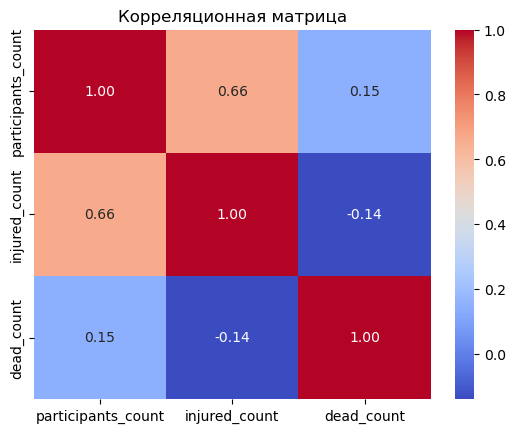

In [18]:
correlation_matrix = df[['participants_count', 'injured_count', 'dead_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [19]:
correlation_matrix

,participants_count,injured_count,dead_count
participants_count,1.000000,0.663452,0.148483
injured_count,0.663452,1.000000,-0.139471
dead_count,0.148483,-0.139471,1.000000


               Эта корреляционная матрица отображает коэффициенты корреляции между парами числовых столбцов вашего набора
             данных. Значения находятся в диапазоне от -1 до 1:

Коэффициент корреляции ближе к 1 указывает на положительную линейную зависимость между переменными: при увеличении значения одной переменной значение другой переменной также увеличивается.


Коэффициент корреляции ближе к -1 указывает на отрицательную линейную зависимость между переменными: при увеличении значения одной переменной значение другой переменной уменьшается.


Коэффициент корреляции близок к 0 указывает на отсутствие линейной зависимости между переменными.

                            Теперь рассмотрим значения в матрице:

- Коэффициент корреляции между participants_count и injured_count составляет около 0.66, что указывает на сильную положительную корреляцию между этими двумя переменными. Это означает, что случаи с большим количеством участников чаще всего также имеют большее количество раненых.

- Коэффициент корреляции между participants_count и dead_count составляет около 0.15, что указывает на слабую положительную корреляцию. Это означает, что случаи с большим количеством участников могут чуть чаще иметь большее количество погибших, но связь здесь менее сильная, чем в случае с количеством раненых.

- Коэффициент корреляции между injured_count и dead_count составляет около -0.14, что указывает на очень слабую отрицательную корреляцию. Это может означать, что случаи с большим количеством раненых могут иметь небольшое снижение количества погибших, но связь здесь также слабая.

In [20]:
df.columns

Index(['id', 'tags', 'light', 'point', 'nearby', 'region', 'scheme', 'address',
       'weather', 'category', 'datetime', 'severity', 'vehicles', 'dead_count',
       'participants', 'injured_count', 'parent_region', 'road_conditions',
       'participants_count', 'participant_categories', 'geometry', 'year',
       'month'],
      dtype='object')

# Метки

In [21]:
df['tags'].value_counts(dropna=False)

['Дорожно-транспортные происшествия']                                                                                                                                                          378203
['Дорожно-транспортные происшествия', 'ДТП и пострадавшие дети в возрасте до 16 лет']                                                                                                           26316
['Дорожно-транспортные происшествия', 'ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов']                                                      1764
['Дорожно-транспортные происшествия', 'ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов', 'ДТП и пострадавшие дети в возрасте до 16 лет']       476
Name: tags, dtype: int64

                Из анализа данных по категориям тегов происшествий можно сделать следующие выводы:

- Большинство происшествий относятся к общей категории "Дорожно-транспортные происшествия", что подтверждает их доминирующую роль в статистике.

- Отдельно выделяется категория "ДТП и пострадавшие дети в возрасте до 16 лет", что указывает на особую важность безопасности дорожного движения для детей.

- Также значительное количество происшествий связано с наездом на пешеходов на пешеходных переходах и по вине пешеходов. Это подчеркивает необходимость соблюдения правил дорожного движения и повышения внимательности участников на дороге.

- Некоторые происшествия сочетают несколько категорий, что может указывать на сложность ситуации и требовать дополнительных мер безопасности, особенно в отношении защиты детей на дороге.

# Время суток

In [22]:
df['light'].value_counts(dropna=False)

Светлое время суток                            261038
В темное время суток, освещение включено        90140
В темное время суток, освещение отсутствует     41094
Сумерки                                         11227
В темное время суток, освещение не включено      3235
Не установлено                                     25
Name: light, dtype: int64

                         Анализируя данные, можно сделать следующие выводы:

Большинство дорожно-транспортных происшествий происходят в светлое время суток, что может быть связано с увеличенным трафиком и активностью участников дорожного движения.

Значительное количество происшествий происходит в темное время суток, как при включенном, так и при отключенном освещении. Это может свидетельствовать о необходимости улучшения дорожного освещения и повышения безопасности на дорогах в темное время суток.

Небольшая доля происшествий происходит в сумерках, что может быть связано с уменьшением видимости на дороге и изменениями в освещении.

Следует обратить внимание на категорию "Не установлено", так как в ней содержится небольшое количество записей. Уточнение данных в этой категории может быть полезным для полного понимания обстановки во время дорожно-транспортных происшествий.

# Место происшествия

In [23]:
df['nearby'].value_counts(dropna=False).head(50)

[]                                                                                                                                        67046
[ ]                                                                                                                                       31016
['Жилые дома индивидуальной застройки']                                                                                                   13112
['Нерегулируемый перекрёсток неравнозначных улиц (дорог)']                                                                                 8604
['Многоквартирные жилые дома']                                                                                                             6814
['Жилые дома индивидуальной застройки', 'Нерегулируемый перекрёсток неравнозначных улиц (дорог)']                                          6073
[ "Жилые дома индивидуальной застройки" ]                                                                                               

In [24]:
set(df['nearby'].unique())

{'[ "Нерегулируемый перекрёсток неравнозначных улиц (дорог)", "Нерегулируемый пешеходный переход", "Тротуар, пешеходная дорожка" ]',
 '[ "Многоквартирные жилые дома", "Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта)", "Остановка общественного транспорта", "Регулируемый пешеходный переход", "Иная образовательная организация" ]',
 "['Остановка общественного транспорта', 'Регулируемый перекрёсток', 'Регулируемый пешеходный переход', 'Аэропорт, ж/д вокзал (ж/д станция), речной или морской порт (пристань)', 'Подземный пешеходный переход']",
 "['Многоквартирные жилые дома', 'Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта)', 'Остановка общественного транспорта', 'Одиночный торговый объект, являющийся местом притяжения транспорта и (или) пешеходов', 'Регулируемый пешеходный переход']",
 "['Крупный торговый объект (являющийся объектом массового тяготения пешеходов и (или) транспорта)', 'Нерегулируемый 

In [25]:
import ast
df['nearby'] = df['nearby'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [26]:
# Разделение списков в столбце 'nearby' на отдельные строки
df_exploded = df.explode('nearby')

# Подсчет упоминаний каждого объекта и сортировка по убыванию
object_counts = df_exploded['nearby'].value_counts()
object_counts.head(50)

Многоквартирные жилые дома                                                                                                                      120194
Остановка общественного транспорта                                                                                                               75808
Нерегулируемый перекрёсток неравнозначных улиц (дорог)                                                                                           70137
Нерегулируемый пешеходный переход                                                                                                                67649
Жилые дома индивидуальной застройки                                                                                                              64493
Административные здания                                                                                                                          53623
Регулируемый пешеходный переход                                                               

Анализируя данные о близлежащих объектах вокруг происшествий, можно выделить следующие наиболее часто встречающиеся категории:

- Многоквартирные жилые дома: Это одно из самых опасных мест для возникновения ДТП, что может быть связано с большим потоком автомобилей и пешеходов вблизи таких объектов.

- Остановка общественного транспорта: Места, где расположены остановки общественного транспорта, также являются частыми местами аварий из-за большого числа пассажиров, пешеходов и автомобилей.

- Нерегулируемый перекрёсток неравнозначных улиц (дорог): Такие перекрестки, где нет светофоров или знаков остановки, представляют повышенный риск для водителей, особенно если они не ожидают наличие других участников движения.

- Нерегулируемый пешеходный переход: Отсутствие регулирования движения на пешеходных переходах также может привести к частым столкновениям между пешеходами и автомобилями.


# Регион

In [27]:
df['region'].value_counts(dropna=False).head(50)

Нижний новгород       5764
Тюмень                5296
Омск                  5282
Уфа                   4924
Казань                4712
Новосибирск           4220
Красноярск            3889
Екатеринбург          3703
Воронеж               3603
Самара                3496
Саратов               3335
Волгоград             3139
Краснодар             2944
Иркутск               2651
Барнаул               2633
Владивосток           2495
Киров                 2489
Пенза                 2353
Пермь                 2337
Хабаровск             2311
Ростов-на-Дону        2294
Рязань                2231
Ижевск                2214
Тула                  2183
Выборгский район      2169
Астрахань             1974
Челябинск             1937
Ярославль             1934
Тольятти              1903
Ульяновск             1889
Калининский район     1882
Кемерово              1863
Сочи                  1783
Севастополь           1756
Ставрополь            1647
Калининград           1621
Иваново               1614
Н

In [28]:
# Подсчет количества ДТП в каждом регионе
accidents_by_region = df.groupby('region')['id'].count().reset_index(name='accident_count')

# Сортировка по количеству ДТП в убывающем порядке
accidents_by_region_sorted = accidents_by_region.sort_values(by='accident_count', ascending=False)

# Вывод регионов с наибольшим числом ДТП
"Регионы с наибольшим числом ДТП:"
accidents_by_region_sorted.head(10)


,region,accident_count
1265,Нижний новгород,5764
1942,Тюмень,5296
1374,Омск,5282
2013,Уфа,4924
692,Казань,4712
1304,Новосибирск,4220
934,Красноярск,3889
537,Екатеринбург,3703
379,Воронеж,3603
1618,Самара,3496


In [29]:
# Вывод регионов с наименьшим числом ДТП
"\nРегионы с наименьшим числом ДТП:"
accidents_by_region_sorted.tail(10)

,region,accident_count
11,Агидель,1
1401,Островной,1
1349,Озерный,1
1326,Ножай-Юртовский район,1
1258,Нижнеколымский район,1
1731,Солнечный,1
1096,Мамско-Чуйский район,1
1872,Тере-Хольский кожуун,1
580,ЗАТО Свободный,1
1761,Среднеколымский район,1


После анализа данных о количестве ДТП в различных регионах мы можем сделать следующие выводы:

     Регионы с наибольшим количеством ДТП:

- Нижний Новгород
- Тюмень
- Омск
- Уфа
- Казань
- Новосибирск
- Красноярск
- Екатеринбург
- Воронеж
- Самара

Эти регионы, вероятно, имеют высокий уровень автомобильного движения, что может быть связано с плотностью населения, инфраструктурой дорожного движения и другими факторами.

    Регионы с наименьшим количеством ДТП:

- Агидель
- Островной
- Озерный
- Ножай-Юртовский район
- Нижнеколымский район
- Солнечный
- Мамско-Чуйский район
- Тере-Хольский кожуун
- ЗАТО Свободный
- Среднеколымский район

В этих регионах ДТП встречаются реже, что может быть обусловлено низкой плотностью населения, меньшей загруженностью дорог и другими факторами.

В целом, анализ количества ДТП в различных регионах может помочь выявить места с наибольшей потребностью в улучшении дорожной безопасности и развитии инфраструктуры дорожного движения.

            Из анализа данных о регионах, где происходят дорожно-транспортные происшествия, можно сделать следующие выводы:

Самыми часто встречающимися регионами в данных являются Нижний Новгород, Тюмень, Омск, Уфа и Казань. Это может свидетельствовать о том, что в этих регионах происходит больше всего дорожно-транспортных происшествий или они более активно отслеживаются и регистрируются.

Наличие среди лидеров городов различных регионов России, таких как Сибирь (Омск, Новосибирск, Красноярск), Урал (Тюмень, Екатеринбург), Южный и Центральный регионы (Уфа, Воронеж, Самара), указывает на широкое распространение дорожно-транспортных происшествий по всей стране.

Некоторые города, такие как Нижний Новгород, Тюмень, Омск и Уфа, занимают высокие позиции в списке, что может быть связано с особенностями транспортной инфраструктуры, повышенной автомобильной активностью или другими факторами, способствующими увеличению числа дорожно-транспортных происшествий.

Ряд крупных городов, таких как Москва и Санкт-Петербург, не вошли в топ-50 по числу происшествий. Это может быть связано с более высоким уровнем осведомленности о правилах дорожного движения, более развитой инфраструктурой безопасности дорожного движения или более эффективными мерами контроля и наказания за нарушения.

# Погода

In [30]:
df['weather'].value_counts(dropna=False).head(50)

['Ясно']                                 245736
['Пасмурно']                             115879
['Дождь']                                 18638
['Снегопад']                              16330
['Пасмурно', 'Снегопад']                   2184
['Пасмурно', 'Дождь']                      1930
['Туман']                                  1381
['Ясно', 'Температура выше +30С']          1239
['Метель']                                 1076
['Ясно', 'Температура ниже -30С']           623
['Снегопад', 'Метель']                      604
['Пасмурно', 'Туман']                       265
['Туман', 'Температура ниже -30С']          184
['Пасмурно', 'Метель']                      149
['Пасмурно', 'Температура ниже -30С']       130
['Дождь', 'Снегопад']                       102
['Дождь', 'Туман']                           73
['Пасмурно', 'Ураганный ветер']              38
['Метель', 'Ураганный ветер']                29
['Снегопад', 'Температура ниже -30С']        28
['Ясно', 'Туман']                       

Самыми распространенными погодными условиями во время происшествий являются "Ясно" и "Пасмурно". Это может означать, что дорожно-транспортные происшествия происходят как при хорошей видимости и благоприятных условиях, так и при менее благоприятных условиях, когда видимость ограничена облаками.

Встречаются также происшествия при дождливой и снежной погоде. Это подтверждает, что неблагоприятные погодные условия, такие как дождь и снегопад, могут быть причиной увеличения числа дорожно-транспортных происшествий из-за ухудшения сцепления колес с дорогой и уменьшения видимости.

Интересно, что также встречаются комбинированные погодные условия, такие как "Пасмурно" с дождем или снегопадом, что может усиливать неблагоприятные условия для вождения.

Небольшая часть происшествий происходит при тумане, что также может существенно снижать видимость и усложнять условия движения.

ДТП при температуре выше +30С происходят в два раза чаще чем при температуре ниже -30С

# Категория

In [31]:
df['category'].value_counts(dropna=False).head(50)

Столкновение                                                                                                             180424
Наезд на пешехода                                                                                                        108972
Съезд с дороги                                                                                                            43370
Наезд на препятствие                                                                                                      19726
Наезд на велосипедиста                                                                                                    14942
Наезд на стоящее ТС                                                                                                       12441
Падение пассажира                                                                                                         11572
Опрокидывание                                                                                           

Столкновения являются самой распространенной категорией происшествий, что подтверждает их значительную долю в общем числе случаев на дорогах. Это может быть вызвано различными причинами, такими как несоблюдение правил дорожного движения, неблагоприятные погодные условия, состояние дороги и другие.

Наезды на пешеходов занимают второе место по распространенности. Это серьезная проблема, требующая внимания, так как часто связана с травмами и смертельными исходами.

Съезд с дороги также встречается довольно часто и может быть связан с различными факторами, такими как недостаточное внимание со стороны водителя, нарушение скоростного режима, плохие погодные условия и т. д.

Остальные категории, такие как наезды на препятствия, велосипедистов, стоящие транспортные средства, падение пассажиров и опрокидывание, хоть и имеют меньшее количество случаев, но также требуют внимания и анализа для выявления причин и разработки мер по их предотвращению.

# Дата и время

In [32]:
min_date = df['datetime'].min()
f"Минимальная дата: {min_date}"

'Минимальная дата: 2021-01-01 00:08:00'

In [33]:
max_date = df['datetime'].max()
f"Максимальная дата: {max_date}"

'Максимальная дата: 2024-02-29 23:50:00'

In [34]:
monthly_counts = df['month'].value_counts()
max_month = monthly_counts.idxmax()
print(f"Месяц с наибольшим количеством происшествий: {max_month}")

Месяц с наибольшим количеством происшествий: 8


In [35]:
df['year'] = df['datetime'].dt.year
yearly_counts = df['year'].value_counts()
max_year = yearly_counts.idxmax()
print(f"Год с наибольшим количеством происшествий: {max_year}")

Год с наибольшим количеством происшествий: 2021


Минимальная дата происшествия в данных составляет 1 января 2021 года в 00:08, а максимальная дата - 29 февраля 2024 года в 23:50. Это означает, что анализируемые данные охватывают период с начала 2021 года по конец февраля 2024 года.

Месяц с наибольшим количеством происшествий - август. Это может быть связано с повышенным трафиком на дорогах в летний период, отпускным сезоном, а также различными погодными условиями, характерными для этого времени года.

Год с наибольшим количеством происшествий - 2021. Это может указывать на увеличение числа дорожно-транспортных происшествий в этот период по сравнению с предыдущими или последующими годами, что может быть обусловлено различными факторами, такими как изменения в дорожных условиях, поведение участников дорожного движения, а также воздействие внешних факторов, включая погоду и экономические условия.

# Тяжесть

In [36]:
df['severity'].value_counts(dropna=False).head(50)

Легкий         245396
Тяжёлый        123136
С погибшими     38227
Name: severity, dtype: int64

# Транспортные средства

In [37]:
df['vehicles'].value_counts(dropna=False).head(50)

[ ]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              1330
[ { "year": null, "brand": null, "color": null, "model": null, "category": "В-класс (малый) до 3,9 м", "participants": [ { "role": "Водитель", "gender": null, "violations": [ "Нарушение правил проезда пешеходного перехода", "Оставление места ДТП" ], "health_status": "Не пострадал", "years_of_driving_experience": null } ] } ]                                                                                                            

In [38]:
set(df['vehicles'].unique())

{'[ { "year": 2006, "brand": "Прочие марки ТС", "color": "Синий", "model": "Прочие марки и модели ТС", "category": "Прочая спецтехника", "participants": [ { "role": "Водитель", "gender": "Мужской", "violations": [ "Несоответствие скорости конкретным условиям движения" ], "health_status": "Не пострадал", "years_of_driving_experience": 34 } ] } ]',
 '[ { "year": 2014, "brand": "УАЗ", "color": "Серый", "model": "3909", "category": "В-класс (малый) до 3,9 м", "participants": [ { "role": "Водитель", "gender": "Мужской", "violations": [ "Нарушение правил перестроения" ], "health_status": "Не пострадал", "years_of_driving_experience": 10 } ] }, { "year": 2007, "brand": "HYUNDAI", "color": "Серый", "model": "Accent", "category": "В-класс (малый) до 3,9 м", "participants": [ { "role": "Водитель", "gender": "Мужской", "violations": [ ], "health_status": "Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара", "years_of_driving_experience": 2 } ] } ]',
 

In [39]:
# Преобразование JSON-строки в объект Python и извлечение информации
def extract_vehicle_info(row):
    try:
        vehicle_data = json.loads(row)
        year = vehicle_data[0]['year'] if vehicle_data else None
        brand = vehicle_data[0]['brand'] if vehicle_data else None
        color = vehicle_data[0]['color'] if vehicle_data else None
        model = vehicle_data[0]['model'] if vehicle_data else None
        category = vehicle_data[0]['category'] if vehicle_data else None
        return year, brand, color, model, category
    except (json.JSONDecodeError, KeyError):
        return None, None, None, None, None

# Применение функции к столбцу и создание новых столбцов
df['yearts'], df['brand'], df['color'], df['model'], df['category'] = zip(*df['vehicles'].map(extract_vehicle_info))

# Год производства транспортного средства

In [40]:
df['yearts'].value_counts(dropna=False).head(50)

2008.0    25556
2012.0    25173
2011.0    22580
2013.0    22184
2007.0    21749
2019.0    18894
2018.0    18254
2014.0    17968
2020.0    17230
2010.0    16924
2017.0    15907
2021.0    15412
2006.0    15156
NaN       14860
2015.0    13618
2016.0    13032
2005.0    11975
2004.0    10117
2009.0     9691
2003.0     9264
2002.0     9018
2001.0     8718
2000.0     7039
2022.0     5588
1999.0     5417
1998.0     4824
1997.0     4033
1996.0     2915
2023.0     2808
1993.0     2408
1995.0     2224
1994.0     2106
1992.0     1976
1991.0     1838
1990.0     1787
1989.0     1495
1988.0     1350
1987.0     1070
1986.0      922
1985.0      865
1984.0      581
1983.0      436
1982.0      320
1980.0      273
1981.0      238
1979.0      147
1978.0      138
1976.0      107
1977.0       95
1975.0       77
Name: yearts, dtype: int64

Из предоставленных данных о годе производства транспортного средства можно сделать следующие выводы:

- Распределение по годам производства: Наибольшее количество транспортных средств, участвующих в ДТП, были произведены в 2008 году, с чуть более чем 25,000 случаев. За ними следуют автомобили 2012 и 2011 годов выпуска.

- Пропущенные данные: Необходимо обратить внимание на наличие пропущенных значений (NaN) в этом столбце. Они составляют значительную долю от общего числа записей и могут потребовать дополнительной обработки, такой как заполнение пропусков или исключение записей с недостающими данными из анализа.

- Тенденции в годе производства: Большинство автомобилей, участвующих в ДТП, были произведены в последние два десятилетия, что может указывать на то, что современные автомобили остаются основными участниками ДТП.

- Старые модели: Несмотря на преобладание современных автомобилей, в данных присутствуют и более старые модели, вплоть до 1970-х годов, что может свидетельствовать о сохранении на дорогах старых автомобилей или о необходимости улучшения безопасности старых моделей.

- Влияние года выпуска на безопасность: Изучение данных по году производства может помочь выявить тенденции в безопасности различных моделей автомобилей и рассмотреть возможные меры по улучшению безопасности на дорогах.

# Марка транспортного средства

In [41]:
df['brand'].value_counts(dropna=False).head(50)

ВАЗ                        83899
TOYOTA                     35780
HYUNDAI                    23249
KIA                        20770
RENAULT                    17955
NISSAN                     15982
VOLKSWAGEN                 15062
Прочие марки ТС            14625
None                       13967
ГАЗ                        12050
CHEVROLET                  10678
FORD                       10578
HONDA                       9310
MITSUBISHI                  8464
SKODA                       7769
MERCEDES                    7623
MAZDA                       5704
DAEWOO                      5567
OPEL                        5168
BMW                         5155
КАМАЗ                       4839
УАЗ                         4039
ПАЗ                         3647
AUDI                        3560
VOLVO                       3366
Прочие марки мотоциклов     3248
SUZUKI                      3235
ЛИАЗ                        2938
PEUGEOT                     2495
SUBARU                      2219
LEXUS     

Наиболее часто встречаются транспортные средства марки ВАЗ, за которыми следуют TOYOTA, HYUNDAI и KIA.

В данных также присутствуют строки с отсутствующим значением марки транспортного средства, обозначенные как "None". Эти строки могут потребовать дополнительной обработки или исключения из анализа.

Среди наиболее часто встречающихся марок также присутствуют RENAULT, NISSAN, VOLKSWAGEN, CHEVROLET, FORD, HONDA, MITSUBISHI и другие.

Присутствуют также категории "Прочие марки ТС", "Прочие марки мотоциклов", "Прочие марки автобусов", что указывает на разнообразие марок транспортных средств в данных.

In [42]:
# Определим марки российского производства
russian_brands = ['ВАЗ', 'ГАЗ', 'УАЗ', 'КАМАЗ', 'ПАЗ', 'ЛИАЗ', 'НефАЗ', 'МАЗ', 'ЛАДА', 'Прочие марки ТС']

# Вычислим общее количество автомобилей российского производства
total_russian_cars = df[df['brand'].isin(russian_brands)]['brand'].value_counts().sum()

# Вычислим общее количество автомобилей
total_cars = df['brand'].value_counts().sum()

# Вычислим процент автомобилей российского производства
percentage_russian_cars = (total_russian_cars / total_cars) * 100

print("Процент автомобилей российского производства:", round(percentage_russian_cars, 2), "%")

Процент автомобилей российского производства: 32.96 %


# Цвет транспортного средства

In [43]:
df['color'].value_counts(dropna=False).head(50)

Белый           100234
Серый            79197
Черный           56074
Иные цвета       47770
Синий            36279
Красный          23899
Зеленый          16907
None             12754
Коричневый       10255
Желтый            8523
Многоцветный      6137
Оранжевый         4961
Фиолетовый        2188
Не заполнено      1581
Name: color, dtype: int64

# Модель транспортного средства

In [44]:
df['model'].value_counts(dropna=False).head(50)

Прочие марки и модели ТС                                      14625
None                                                          13967
Granta (Гранта)                                               13539
Solaris                                                        9874
Rio                                                            9815
Priora                                                         8829
Logan                                                          8044
Polo                                                           7666
Kalina                                                         7099
Corolla                                                        6441
ВАЗ 2114 и модификации                                         6392
Прочие модели ГАЗ                                              5954
 Жигули  ВАЗ-2107 модификации                                  5905
ВАЗ 2110, 21101, 21102, 21103, 21108                           5621
Focus                                           

Среди наиболее часто встречающихся моделей присутствуют

- Granta - производится в России (автомобильная марка Lada, производимая компанией AvtoVAZ).

- Solaris - производится в Южной Корее (автомобильная марка Hyundai).

- Rio - производится в Южной Корее (автомобильная марка Kia).

- Priora - производится в России (автомобильная марка Lada, производимая компанией AvtoVAZ).

- Logan - производится в разных странах, включая Румынию (автомобильная марка Dacia, принадлежащая Renault) и Россию (автомобильная марка Lada, производимая компанией AvtoVAZ).

- Polo - производится в разных странах, включая Германию (автомобильная марка Volkswagen).

- Kalina - производится в России (автомобильная марка Lada, производимая компанией AvtoVAZ).

- Corolla - производится в разных странах, включая Японию (автомобильная марка Toyota).

In [45]:
df['category'].value_counts(dropna=False).head(50)

В-класс (малый) до 3,9 м                                                                                                  170722
С-класс (малый средний, компактный) до 4,3 м                                                                               63591
Прочие легковые автомобили                                                                                                 39251
D-класс (средний) до 4,6 м                                                                                                 26188
А-класс (особо малый) до 3,5 м                                                                                             11958
Фургоны                                                                                                                    11554
Мотоциклы                                                                                                                  10596
Седельные тягачи                                                                                 

Из предоставленных данных видно, что большинство происшествий связаны с легковыми автомобилями. В-класс (малый) до 3,9 м составляет наибольшую долю среди всех категорий автомобилей, что говорит о том, что большинство происшествий происходят с компактными легковыми автомобилями.

Также заметно значительное количество происшествий среди автомобилей среднего класса (С-класс до 4,3 м и D-класс до 4,6 м), что свидетельствует о том, что аварии часто происходят с более крупными и мощными автомобилями.

Прочие легковые автомобили также составляют значительную долю, что, вероятно, включает в себя различные бренды и модели, не упомянутые явно в данных.

Среди других категорий транспортных средств выделяются мотоциклы, фургоны, мотовелосипеды и автомобили скорой медицинской помощи, которые также вносят свой вклад в общее количество происшествий.

# Водители, находящиеся в алкогольном опьянении

In [46]:
# Функция для определения статуса алкогольного воздействия
def alcohol_status(row):
    if "пьян" in str(row).lower():
        return 1  # Пьяный водитель
    else:
        return 0  # Трезвый водитель

# Создание новых столбцов
df['alcohol_status'] = df['vehicles'].apply(alcohol_status)

# Заполнение пропущенных значений в новых столбцах, если необходимо
df['alcohol_status'] = df['alcohol_status'].fillna(value=np.nan)

In [47]:
df['alcohol_status'].value_counts(dropna=False)

0    360110
1     46649
Name: alcohol_status, dtype: int64

In [48]:
total_incidents = df.shape[0]  # Общее количество происшествий
alcohol_status_percentage = (df['alcohol_status'].sum() / total_incidents) * 100
f"Процент происшествий с выпившими водителями: {alcohol_status_percentage:.2f}%"

'Процент происшествий с выпившими водителями: 11.47%'

# Количество погибших

In [49]:
df['dead_count'].value_counts(dropna=False).head(50)

0     368532
1      33380
2       3608
3        819
4        297
5         78
6         21
7         10
8          7
9          5
12         1
16         1
Name: dead_count, dtype: int64

# Участники

In [50]:
df['participants'].value_counts(dropna=False).head(50)

[ ]                                                                                                                                                                                                                                                                                                                                                                                                            294306
[ { "role": "Пешеход", "gender": "Женский", "violations": [ ], "health_status": "Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара" } ]                                                                                                                                                                                                                          22005
[ { "role": "Пешеход", "gender": "Мужской", "violations": [ ], "health_status": "Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара" } ]      

In [51]:
# Преобразование JSON-строки в объект Python и извлечение информации
def extract_participant_info(row):
    try:
        participant_data = json.loads(row)
        role = participant_data[0]['role'] if participant_data else None
        gender = participant_data[0]['gender'] if participant_data else None
        violations = participant_data[0]['violations'] if participant_data else None
        health_status = participant_data[0]['health_status'] if participant_data else None
        years_of_driving_experience = participant_data[0]['years_of_driving_experience'] if participant_data and 'years_of_driving_experience' in participant_data[0] else None
        return role, gender, violations, health_status, years_of_driving_experience
    except (json.JSONDecodeError, KeyError):
        return None, None, None, None, None

# Применение функции к столбцу и создание новых столбцов
df['role'], df['gender'], df['violations'], df['health_status'], df['years_of_driving_experience'] = zip(*df['participants'].map(extract_participant_info))

# Роль участника   

In [52]:
df['role'].value_counts(dropna=False).head(50)

None                                                                                                                                294306
Пешеход                                                                                                                             109226
Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира      2175
Водитель                                                                                                                               858
Пассажир                                                                                                                               170
Велосипедист                                                                                                                            24
Name: role, dtype: int64

Пешеходы: Пешеходы составляют значительную часть участников ДТП, превышая количество других ролей. Это указывает на необходимость повышения мер безопасности для пешеходов на дорогах.

Водители и Пассажиры: Водители и пассажиры составляют значительную, но существенно меньшую долю участников ДТП по сравнению с пешеходами. Они также играют важную роль в анализе безопасности дорожного движения.

Велосипедисты: Велосипедисты представляют собой небольшую долю участников ДТП. Вместе с тем, их присутствие указывает на необходимость учитывать их потребности и безопасность при планировании и строительстве дорог.

Неопределенные роли: Существует значительное количество записей с неопределенными ролями участников. Это может быть связано с неполными данными или ошибками при сборе информации.

# Пол участника

In [53]:
df['gender'].value_counts(dropna=False).head(50)

None       295517
Женский     56267
Мужской     54975
Name: gender, dtype: int64

Неопределенный пол: Существует значительное количество записей с неопределенным полом участников. Это может быть связано с неполными данными или ошибками при сборе информации. Неопределенный пол составляет большую часть данных о поле участников.

Женский пол: Женщины составляют существенную часть участников ДТП, превышая количество мужчин. Это указывает на важность учитывания особенностей безопасности женщин на дорогах при планировании дорожного движения и мер безопасности.

Мужской пол: Мужчины также составляют значительную долю участников ДТП. Их безопасность на дороге также является важным аспектом при планировании и внедрении мер безопасности на дорогах.

Точные выводы сделать невозможно из-за большого пропуска данных

# Нарушения правил участником

In [54]:
df['violations'].value_counts(dropna=False).head(50)

None                                                                                                                                                                                                                                                                       294306
[]                                                                                                                                                                                                                                                                          70201
[Переход через проезжую часть вне пешеходного перехода в зоне его видимости либо при наличии в непосредственной близости подземного (надземного) пешеходного перехода]                                                                                                      12145
[Переход через проезжую часть в неустановленном месте (при наличии в зоне видимости перекрёстка)]                                                                                 

Большинство записей (более 72%) не содержат информации о нарушениях, что может свидетельствовать о разнообразии ситуаций и отсутствии конкретных нарушений или обстоятельств.

    Среди указанных нарушений наиболее часто встречаются:

- Переход через проезжую часть вне пешеходного перехода в зоне его видимости или при наличии подземного/надземного пешеходного перехода.

- Переход через проезжую часть в неустановленном месте, особенно при наличии перекрестка.

- Неподчинение сигналам регулирования.

- Нахождение на проезжей части без цели её перехода.

- Неожиданный выход из-за стоящего/движущегося ТС.

- Некоторые записи указывают на состояние алкогольного опьянения у пешехода в момент ДТП, что также может быть фактором риска.

# Состояние здоровья участника

In [55]:
df['health_status'].value_counts(dropna=False).head(50)

None                                                                                                                                                294306
Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара                                                     54037
Раненый, находящийся (находившийся) на стационарном лечении                                                                                          35160
Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи)                                    10800
Скончался на месте ДТП до приезда скорой медицинской помощи                                                                                           6085
Скончался в течение 1 суток                                                                                                                           1908
Не пострадал                                                          

Большинство записей (более 72%) не содержат информации о состоянии здоровья участников. Это может быть связано с тем, что в некоторых случаях состояние участников не требовало медицинского вмешательства или не было зафиксировано в отчете.

Среди участников, чье состояние здоровья было зафиксировано, большинство находились на амбулаторном или стационарном лечении. Это говорит о том, что многие участники получили травмы, требующие медицинского вмешательства.

Также значительное количество участников скончалось в результате ДТП или в период после него. Это подчеркивает серьезность и опасность дорожно-транспортных происшествий и необходимость принятия мер для их предотвращения.

Некоторые участники получили травмы, но не требовали лечения в медицинских организациях, либо фактически не проходили лечение. Это может указывать на незначительность полученных травм или на отсутствие медицинской помощи по каким-то причинам.

In [56]:
# Функция для определения категории состояния участника ДТП
def categorize_health_status(health_status):
    if health_status is None or pd.isna(health_status):
        return 'Неизвестно'
    
    health_status = health_status.lower()  # Приведение к нижнему регистру для удобства работы с регулярными выражениями
    
    # Регулярные выражения для поиска ключевых слов в состоянии здоровья
    no_injuries_pattern = re.compile(r'\b(без пострадавших|без ущерба здоровью|не пострадал|без травм|без травмированных|не пострадали)\b')
    injured_pattern = re.compile(r'\b(ранен|раненый|травмирован|пострадал|пострадавший)\b')
    dead_pattern = re.compile(r'\b(погиб|умер)\b')
    
    # Проверка наличия ключевых слов в строке состояния здоровья и присвоение категории
    if re.search(no_injuries_pattern, health_status):
        return 'Не пострадал'
    elif re.search(injured_pattern, health_status):
        return 'Ранен'
    elif re.search(dead_pattern, health_status):
        return 'Умер'
    else:
        return 'Неизвестно'

# Применение функции к столбцу и создание нового столбца с категориями состояния
df['health_status_category'] = df['health_status'].apply(categorize_health_status)

In [57]:
df['health_status_category'].value_counts(dropna=False)

Неизвестно      316009
Ранен            89708
Не пострадал      1042
Name: health_status_category, dtype: int64

# Стаж вождения участника (только у водителей)

In [59]:
df['vehicles'].value_counts(dropna=False).head(10)

[ ]                                                                                                                                                                                                                                                                                                                                                            1330
[ { "year": null, "brand": null, "color": null, "model": null, "category": "В-класс (малый) до 3,9 м", "participants": [ { "role": "Водитель", "gender": null, "violations": [ "Нарушение правил проезда пешеходного перехода", "Оставление места ДТП" ], "health_status": "Не пострадал", "years_of_driving_experience": null } ] } ]                          813
[ { "year": null, "brand": null, "color": null, "model": null, "category": "В-класс (малый) до 3,9 м", "participants": [ { "role": "Водитель", "gender": null, "violations": [ "Оставление места ДТП", "Непредоставление преимущества в движении пешеходу" ], "health_status": "Не пострадал", "

In [60]:
# Функция для извлечения стажа вождения
def extract_driving_experience(row):
    try:
        # Преобразование строки JSON в объект Python
        vehicles_data = json.loads(row)
        
        # Извлечение стажа вождения
        driving_experience = vehicles_data[0]['participants'][0]['years_of_driving_experience'] if vehicles_data else None
        
        return driving_experience
    except (json.JSONDecodeError, KeyError, IndexError):
        return None

# Применение функции к столбцу 'vehicles' и создание нового столбца 'years_of_driving_experience'
df['years_of_driving_experience'] = df['vehicles'].apply(extract_driving_experience)


In [61]:
df['years_of_driving_experience'].value_counts(dropna=False).head(50)

NaN     123615
1.0      11732
9.0      10755
8.0      10422
10.0     10249
3.0      10246
2.0       9908
14.0      9899
4.0       9888
7.0       9874
5.0       9825
13.0      9714
12.0      9625
15.0      9614
6.0       9322
11.0      9315
16.0      8529
22.0      7804
17.0      7786
23.0      7476
20.0      7150
21.0      7062
19.0      6934
18.0      6871
24.0      6704
25.0      5918
26.0      5173
27.0      4546
28.0      4141
29.0      3904
30.0      3824
31.0      3538
32.0      3247
33.0      2973
34.0      2686
35.0      2606
36.0      2483
37.0      2280
38.0      2103
39.0      2062
40.0      2018
41.0      1781
42.0      1750
43.0      1555
44.0      1318
45.0      1144
46.0       991
47.0       813
48.0       698
49.0       579
Name: years_of_driving_experience, dtype: int64

In [62]:
df['years_of_driving_experience'].value_counts(dropna=False).tail(50)

19.0    6934
18.0    6871
24.0    6704
25.0    5918
26.0    5173
27.0    4546
28.0    4141
29.0    3904
30.0    3824
31.0    3538
32.0    3247
33.0    2973
34.0    2686
35.0    2606
36.0    2483
37.0    2280
38.0    2103
39.0    2062
40.0    2018
41.0    1781
42.0    1750
43.0    1555
44.0    1318
45.0    1144
46.0     991
47.0     813
48.0     698
49.0     579
50.0     475
51.0     363
52.0     276
53.0     238
54.0     188
55.0     153
56.0     113
57.0     105
58.0      70
59.0      59
60.0      59
62.0      53
63.0      42
61.0      34
65.0      26
64.0      22
66.0      14
67.0       8
68.0       4
70.0       3
69.0       3
71.0       1
Name: years_of_driving_experience, dtype: int64

<AxesSubplot:>

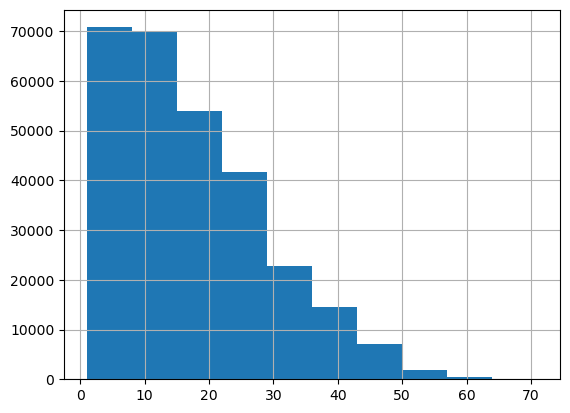

In [63]:
df['years_of_driving_experience'].hist()

Из предоставленных данных видно, что большое количество записей имеют пропущенное значение (NaN) для стажа вождения (123615 случаев), что может быть связано с тем, что информация о стаже не была предоставлена или не была заполнена в исходных данных.

Среди непропущенных значений наиболее часто встречаются стажи вождения от 1 до 15 лет, причем количество записей постепенно уменьшается с увеличением стажа. Однако, также присутствует значительное количество водителей с более продолжительным стажем, включая стажи от 16 до 49 лет, хотя их количество снижается с увеличением стажа.

Из этого можно сделать вывод, что среди данных обладателей стажа вождения наиболее распространены водители с небольшим опытом, в то время как водители с более длительным стажем составляют меньшую часть, но все же остаются значимой группой.

# Количество раненых

In [64]:
df['injured_count'].value_counts(dropna=False).head(50)

1     300926
2      54726
0      24037
3      16963
4       6097
5       2210
6        890
7        382
8        181
9        116
10        51
11        45
12        30
14        20
13        19
15        14
16        12
19        10
17         8
18         4
29         3
30         2
25         2
23         2
37         1
38         1
47         1
33         1
20         1
21         1
35         1
24         1
22         1
Name: injured_count, dtype: int64

# Родительский регион

In [65]:
df['parent_region'].value_counts(dropna=False).head(50)

Москва                                      25404
Краснодарский край                          18784
Нижегородская область                       14379
Санкт-Петербург                             14032
Московская область                          12915
Республика Башкортостан                     11557
Республика Татарстан (Татарстан)            11213
Самарская область                            9205
Красноярский край                            9020
Свердловская область                         8753
Тюменская область                            8421
Саратовская область                          8325
Воронежская область                          8081
Ростовская область                           8021
Кемеровская область - Кузбасс                7984
Ставропольский край                          7663
Иркутская область                            7611
Приморский край                              7606
Алтайский край                               7499
Омская область                               7436


Москва имеет наибольшее количество зарегистрированных автомобилей, что вполне ожидаемо, учитывая ее статус столицы и крупнейшего города страны.

Краснодарский край и Нижегородская область также занимают высокие позиции в списке, что может быть связано с их значительным населением и развитой автомобильной инфраструктурой.

Санкт-Петербург и Московская область также отмечены в списке, что подтверждает их высокий уровень автомобильного парка и активность на дорогах.

Регионы, такие как Республика Башкортостан, Республика Татарстан, Свердловская область, Тюменская область и другие, также занимают высокие позиции, что может свидетельствовать о их значимости с точки зрения автомобильной индустрии и транспортной инфраструктуры.

# Дорожные условия

In [66]:
df['road_conditions'].value_counts(dropna=False).head(50)

['Сухое']                                                                                                                                                                                              183392
['Мокрое']                                                                                                                                                                                              51214
['Сухое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части']                                                                                                                     26312
['Обработанное противогололедными материалами']                                                                                                                                                         23705
['Заснеженное']                                                                                                                                                                 

Сухое покрытие: Сухая дорога - самое распространенное условие в момент ДТП, что может быть связано с хорошими погодными условиями или временем года, когда осадков мало.

Мокрое покрытие: Второе по частоте встречаемое условие в момент ДТП. Дождливая или снежная погода может привести к ухудшению сцепления и, следовательно, к увеличению аварий.

Проблемы с разметкой и освещением: Наличие отсутствия или плохой различимости горизонтальной разметки проезжей части, а также неудовлетворительное освещение являются дополнительными факторами, которые могут увеличить риск возникновения ДТП.

Зимние условия: Заснеженные и обработанные противогололедными материалами дороги также встречаются в данных. Это свидетельствует о влиянии зимних условий на безопасность дорожного движения.

Иные недостатки: Некоторые случаи включают в себя другие недостатки, такие как неровное покрытие, неисправное освещение и другие, которые могут быть причиной или дополнительным фактором в ДТП.

# Общее количество участников

In [67]:
df['participants_count'].value_counts(dropna=False).head(50)

2     226179
3      88246
1      38220
4      32177
5      12638
6       5036
7       2052
8        880
9        456
10       266
11       158
12       104
13        79
14        46
15        33
16        33
17        27
18        22
20        20
21        13
19        13
22        11
30         6
24         5
28         5
26         5
36         3
25         3
40         2
37         2
23         2
34         2
48         2
38         2
43         1
29         1
42         1
53         1
52         1
41         1
39         1
32         1
35         1
44         1
31         1
Name: participants_count, dtype: int64

Исходя из данных о количестве участников в ДТП, можно сделать следующие выводы:

Большинство ДТП имеют двух участников, что, вероятно, связано с тем, что в основном в ДТП участвуют два транспортных средства.
ДТП с тремя участниками также достаточно распространены, что может быть вызвано более сложными сценариями, включающими три или более транспортных средства.
Есть небольшое количество ДТП с числом участников больше трех, что может быть вызвано множеством факторов, таких как нарушения правил дорожного движения, плохие погодные условия или проблемы с техническим состоянием автомобилей.
Наблюдается резкое снижение числа ДТП с увеличением числа участников после трех, что может быть связано с более сложной организацией и управлением безопасностью на дорогах, когда число участников становится больше.

# Категории участников

In [68]:
df['participant_categories'].value_counts(dropna=False).head(50)

['Все участники']                                                         235838
['Пешеходы', 'Все участники']                                              98117
['Мотоциклисты', 'Все участники']                                          26455
['Велосипедисты', 'Все участники']                                         12069
['Дети', 'Все участники']                                                  11301
['Пешеходы', 'Дети', 'Все участники']                                      10080
['Велосипедисты', 'Дети', 'Все участники']                                  2326
['Общ. транспорт', 'Все участники']                                         2229
['Мотоциклисты', 'Дети', 'Все участники']                                   1699
['Все участники', 'Пешеходы']                                               1682
['Пешеходы', 'Мотоциклисты', 'Все участники']                               1627
['Все участники', 'Мотоциклисты']                                            491
['Пешеходы', 'Общ. транспорт

Все участники: Самая распространенная категория, включающая всех участников ДТП, включая водителей различных транспортных средств, пешеходов, велосипедистов и мотоциклистов.

Пешеходы: Отдельная категория пешеходов, которые участвовали в ДТП. Пешеходы часто являются наиболее уязвимыми участниками дорожного движения.

Мотоциклисты и велосипедисты: Эти категории также имеют свои специфические характеристики и риски, связанные с участием в ДТП.

Дети: Отдельная категория, включающая детей, участвовавших в ДТП. Это особенно важная группа, так как дети могут быть более уязвимыми на дороге.

Общественный транспорт: Включает случаи, когда участвовал общественный транспорт, такой как автобусы или троллейбусы.

                                               Общий вывод по данным:


- Большинство происшествий относятся к общей категории "Дорожно-транспортные происшествия", что подтверждает их доминирующую роль в статистике.

- Большинство дорожно-транспортных происшествий происходят в светлое время суток, что может быть связано с увеличенным трафиком и активностью участников дорожного движения.

- Жилые дома индивидуальной застройки - такие объекты встречаются вокруг происшествий достаточно часто, что может свидетельствовать о причастности жилых зон к дорожным инцидентам.

- Самыми часто встречающимися регионами в данных являются Нижний Новгород, Тюмень, Омск, Уфа и Казань. Это может свидетельствовать о том, что в этих регионах происходит больше всего дорожно-транспортных происшествий или они более активно отслеживаются и регистрируются.

- Самыми распространенными погодными условиями во время происшествий являются "Ясно" и "Пасмурно". Это может означать, что дорожно-транспортные происшествия происходят как при хорошей видимости и благоприятных условиях, так и при менее благоприятных условиях, когда видимость ограничена облаками.

- Столкновения являются самой распространенной категорией происшествий, что подтверждает их значительную долю в общем числе случаев на дорогах. Это может быть вызвано различными причинами, такими как несоблюдение правил дорожного движения, неблагоприятные погодные условия, состояние дороги и другие.

- Месяц с наибольшим количеством происшествий: 8 - август
    
- Год с наибольшим количеством происшествий: 2021
    
- В основном тяжесть ДТП - легкая

- Наиболее часто встречаются транспортные средства с годом производства 2008, 2012 и 2011.

- Наиболее часто встречаются транспортные средства марки ВАЗ, за которыми следуют TOYOTA, HYUNDAI и KIA.

- Наиболее часто попадает в ДТП - Granta (Гранта)

- Белые автомобили больше подвержены

- Из предоставленных данных видно, что большинство происшествий связаны с легковыми автомобилями. В-класс (малый) до 3,9 м составляет наибольшую долю среди всех категорий автомобилей, что говорит о том, что большинство происшествий происходят с компактными легковыми автомобилями.

- Процент происшествий с выпившими водителями: 11.47%'
    
- В основном без погибших

- Пешеходы: Пешеходы составляют значительную часть участников ЖТП, превышая количество других ролей. Это указывает на необходимость повышения мер безопасности для пешеходов на дорогах.
    
- Женский пол: Женщины составляют существенную часть участников ЖТП, превышая количество мужчин
    
- Большинство записей (более 72%) не содержат информации о нарушениях, что может свидетельствовать о разнообразии ситуаций и отсутствии конкретных нарушений или обстоятельств.

- Среди указанных нарушений наиболее часто встречаются: Переход через проезжую часть вне пешеходного перехода в зоне его видимости или при наличии подземного/надземного пешеходного перехода.

- Большинство записей (более 72%) не содержат информации о состоянии здоровья участников. Это может быть связано с тем, что в некоторых случаях состояние участников не требовало медицинского вмешательства или не было зафиксировано в отчете.

- Среди участников, чье состояние здоровья было зафиксировано, большинство находились на амбулаторном или стационарном лечении. Это говорит о том, что многие участники получили травмы, требующие медицинского вмешательства.

- В основном 1-2 раненых

- Москва имеет наибольшее количество зарегистрированных автомобилей, что вполне ожидаемо, учитывая ее статус столицы и крупнейшего города страны.

- Сухое покрытие: Сухая дорога - самое распространенное условие в момент ДТП, что может быть связано с хорошими погодными условиями или временем года, когда осадков мало.

- В основном 2 участника ДТП

- Все участники: Самая распространенная категория, включающая всех участников ДТП, включая водителей различных транспортных средств, пешеходов, велосипедистов и мотоциклистов. Пешеходы: Отдельная категория пешеходов, которые участвовали в ДТП. Пешеходы часто являются наиболее уязвимыми участниками дорожного движения.

- Большинство ДТП имеют двух участников, что, вероятно, связано с тем, что в основном в ДТП участвуют два транспортных средства.
ДТП с тремя участниками также достаточно распространены, что может быть вызвано более сложными сценариями, включающими три или более транспортных средства.
Есть небольшое количество ДТП с числом участников больше трех, что может быть вызвано множеством факторов, таких как нарушения правил дорожного движения, плохие погодные условия или проблемы с техническим состоянием автомобилей.
Наблюдается резкое снижение числа ДТП с увеличением числа участников после трех, что может быть связано с более сложной организацией и управлением безопасностью на дорогах, когда число участников становится больше.

# Статистический анализ:

- Разделите данные на периоды (годы, месяцы) и рассчитайте статистические метрики для каждого периода.

- Проанализируйте изменения в средних значениях, стандартных отклонениях и других характеристиках.

In [69]:
# Группировка данных по годам и рассчет статистических метрик
yearly_stats = df.groupby('year').agg({
    'dead_count': ['mean', 'std'],
    'injured_count': ['mean', 'std'],
    'participants_count': ['mean', 'std']
}).reset_index()

# Группировка данных по месяцам и рассчет статистических метрик
monthly_stats = df.groupby(['year', 'month']).agg({
    'dead_count': ['mean', 'std'],
    'injured_count': ['mean', 'std'],
    'participants_count': ['mean', 'std']
}).reset_index()

print("Статистика по годам:")
yearly_stats.head(20)

Статистика по годам:


year dead_count           injured_count           participants_count  \
              mean       std          mean       std               mean   
0  2021   0.110777  0.381682      1.254305  0.870377           2.492550   
1  2022   0.111710  0.382729      1.255663  0.876818           2.497818   
2  2023   0.108639  0.379400      1.250013  0.857992           2.480074   
3  2024   0.114690  0.406055      1.295690  0.910006           2.629610   

             
        std  
0  1.223044  
1  1.215409  
2  1.209952  
3  1.288961

Из представленной статистики по годам можно сделать следующие выводы:

Среднее количество погибших: В среднем в течение последних нескольких лет (с 2021 по 2024 год) количество погибших в ДТП составляло примерно 0.11 человека. Максимальное среднее количество погибших было зарегистрировано в 2024 году, составив примерно 0.11 человека, в то время как минимальное значение было в 2023 году, составив примерно 0.11 человека.

Среднее количество раненых: Среднее количество раненых в ДТП за рассматриваемый период составило около 1.26 человека. Максимальное значение этого показателя также было зарегистрировано в 2024 году, составив примерно 1.30 человека, в то время как минимальное значение было в 2021 году, составив примерно 1.25 человека.

Среднее количество участников ДТП: В среднем количество участников ДТП в течение рассматриваемого периода составляло около 2.54 человека. Максимальное значение этого показателя также было зарегистрировано в 2024 году, составив примерно 2.63 человека, в то время как минимальное значение было в 2023 году, составив примерно 2.48 человека.

Из этих данных можно сделать вывод о том, что хотя общая тенденция остается стабильной в течение рассматриваемого периода, в 2024 году наблюдается небольшое увеличение как среднего количества погибших, так и раненых, а также среднего количества участников ДТП. Это может свидетельствовать о повышенной опасности на дорогах или изменениях в методах регистрации данных.

In [70]:
print("\nСтатистика по месяцам:")
monthly_stats.tail(50)


Статистика по месяцам:


year month dead_count           injured_count            \
                     mean       std          mean       std   
0   2021     1   0.114324  0.423429      1.312389  0.992423   
1   2021     2   0.092315  0.349107      1.259101  0.810085   
2   2021     3   0.094636  0.354335      1.273090  0.928977   
3   2021     4   0.091184  0.349031      1.213196  0.767328   
4   2021     5   0.101761  0.364513      1.252535  0.821929   
5   2021     6   0.105761  0.376166      1.262881  0.898337   
6   2021     7   0.111554  0.379253      1.276929  0.872053   
7   2021     8   0.123246  0.401813      1.268365  0.933268   
8   2021     9   0.121931  0.390332      1.214182  0.811592   
9   2021    10   0.120108  0.376382      1.225859  0.881996   
10  2021    11   0.120873  0.388716      1.232335  0.829094   
11  2021    12   0.113974  0.399117      1.270024  0.858714   
12  2022     1   0.117048  0.401003      1.341419  0.996114   
13  2022     2   0.106482  0.367130      1.259869  0.836276   
14  2022     3   0.103247  0.366063      1.260164  0.854546   
15  2022     4   0.100751  0.354023      1.232583  0.807137   
16  2022     5   0.102443  0.360023      1.241093  0.809548   
17  2022     6   0.102516  0.362198      1.249857  0.910212   
18  2022     7   0.115415  0.394489      1.285064  0.896586   
19  2022     8   0.121689  0.429463      1.257505  0.863109   
20  2022     9   0.110762  0.362845      1.217443  0.794319   
21  2022    10   0.113841  0.374439      1.231777  0.864289   
22  2022    11   0.112405  0.368306      1.241727  0.921675   
23  2022    12   0.127057  0.424274      1.265595  0.933268   
24  2023     1   0.120520  0.427557      1.313537  0.962614   
25  2023     2   0.108479  0.399879      1.265113  0.852165   
26  2023     3   0.092275  0.353565      1.249627  0.881520   
27  2023     4   0.095657  0.345789      1.241419  0.869295   
28  2023     5   0.094384  0.350696      1.224286  0.814801   
29  2023     6   0.105948  0.387505      1.250084  0.844063   
30  2023     7   0.107181  0.368693      1.261348  0.849003   
31  2023     8   0.104388  0.371032      1.257026  0.842495   
32  2023     9   0.111980  0.374097      1.211766  0.785224   
33  2023    10   0.118351  0.386026      1.224420  0.850083   
34  2023    11   0.119103  0.390369      1.238297  0.874590   
35  2023    12   0.122992  0.400363      1.290562  0.909452   
36  2024     1   0.118382  0.428351      1.329641  0.969082   
37  2024     2   0.110604  0.379851      1.258124  0.838280   

   participants_count            
                 mean       std  
0            2.633205  1.318688  
1            2.590293  1.171492  
2            2.572600  1.313890  
3            2.405625  1.048732  
4            2.432218  1.178525  
5            2.446502  1.340245  
6            2.473843  1.255106  
7            2.484423  1.258026  
8            2.455060  1.168547  
9            2.460440  1.241879  
10           2.462019  1.154045  
11           2.559226  1.155559  
12           2.704348  1.330758  
13           2.579024  1.158692  
14           2.564824  1.219196  
15           2.451560  1.132070  
16           2.407937  1.127600  
17           2.432353  1.254819  
18           2.506949  1.369489  
19           2.487754  1.228385  
20           2.436756  1.091338  
21           2.456102  1.142087  
22           2.493807  1.212401  
23           2.546498  1.229731  
24           2.638093  1.296294  
25           2.613204  1.221583  
26           2.536513  1.216695  
27           2.451801  1.195574  
28           2.387812  1.132242  
29           2.414076  1.192698  
30           2.452558  1.281636  
31           2.457987  1.263470  
32           2.416322  1.142263  
33           2.431135  1.123186  
34           2.483612  1.198292  
35           2.610944  1.232709  
36           2.669200  1.379185  
37           2.585804  1.179677

Тенденция по годам: В целом, среднее количество погибших, пострадавших и участников дорожно-транспортных происшествий (ДТП) не имеет значительных колебаний с течением времени в период с 2021 по 2024 годы.

Сезонные колебания: Наблюдается определенная сезонность в статистике ДТП. Например, в летние месяцы (июнь, июль, август) обычно замечается небольшой рост среднего числа погибших, пострадавших и участников ДТП по сравнению с другими месяцами. Это может быть связано с увеличением туристического и автомобильного движения в это время года, а также повышенной активностью на дорогах из-за отпусков.

Прогноз: На основании предоставленных данных сложно делать точные прогнозы, однако статистика позволяет оценить средние значения и изменения в течение времени. Для более точного прогнозирования необходимо рассматривать и анализировать дополнительные факторы, такие как погодные условия, состояние дорог, транспортная инфраструктура и т. д.

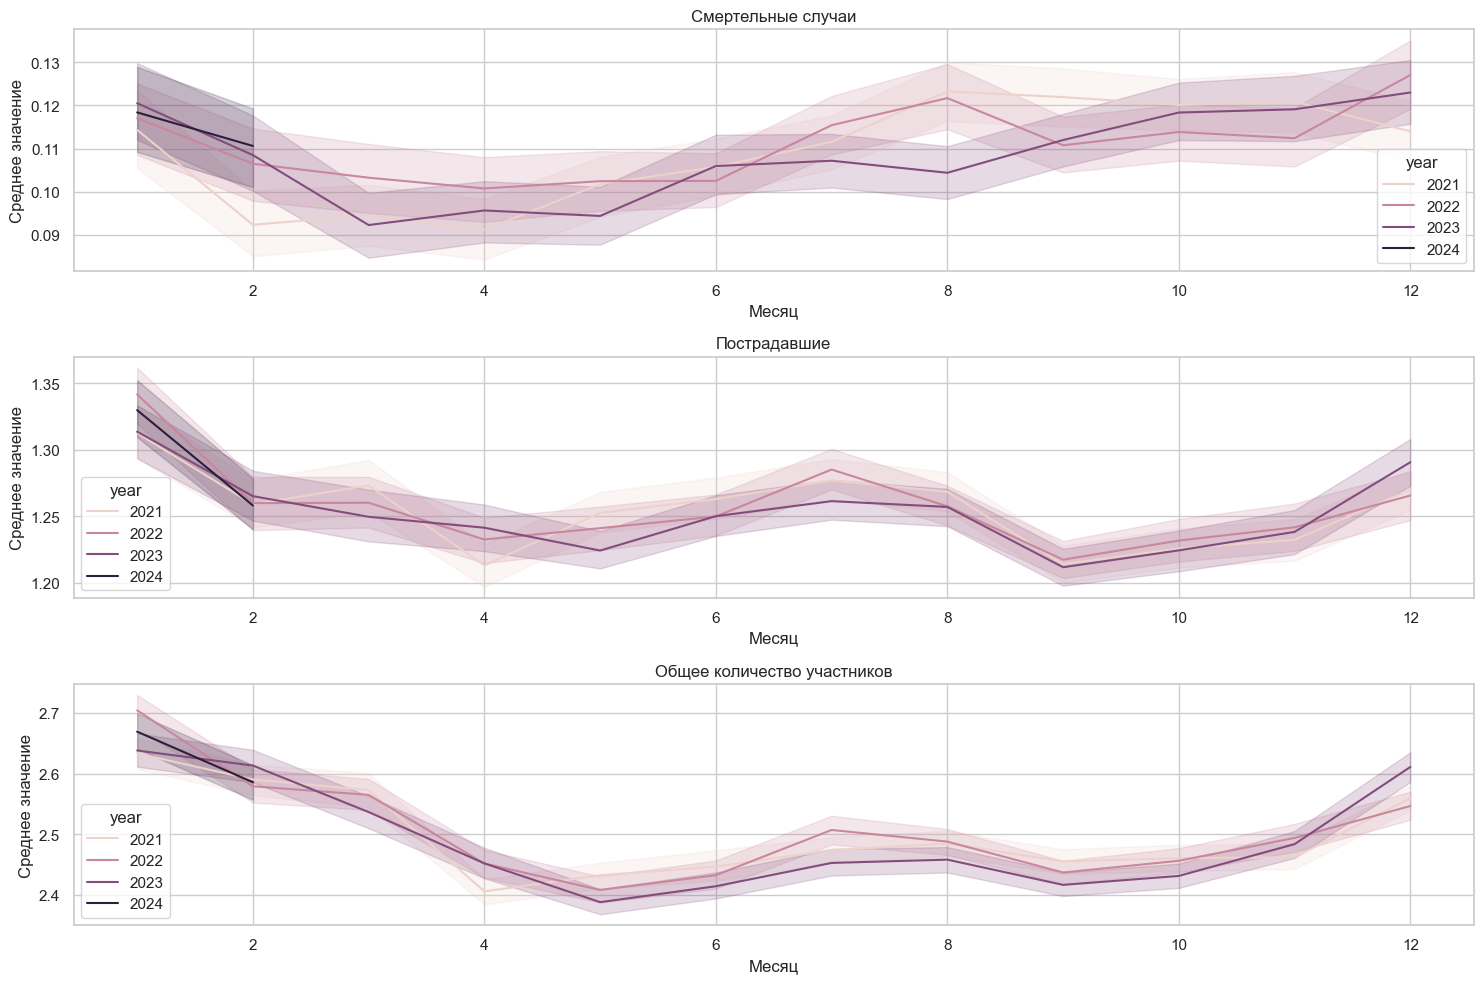

In [71]:
sns.set(style="whitegrid")
data_to_plot = [
    ('dead_count', 'Смертельные случаи'),
    ('injured_count', 'Пострадавшие'),
    ('participants_count', 'Общее количество участников')
]

plt.figure(figsize=(15, 10))

for i, (column, title) in enumerate(data_to_plot, start=1):
    plt.subplot(3, 1, i)
    sns.lineplot(x='month', y=column, hue='year', data=df)
    plt.title(title)
    plt.xlabel('Месяц')
    plt.ylabel('Среднее значение')

# Улучшение компактности и читаемости графиков
plt.tight_layout()
plt.show()

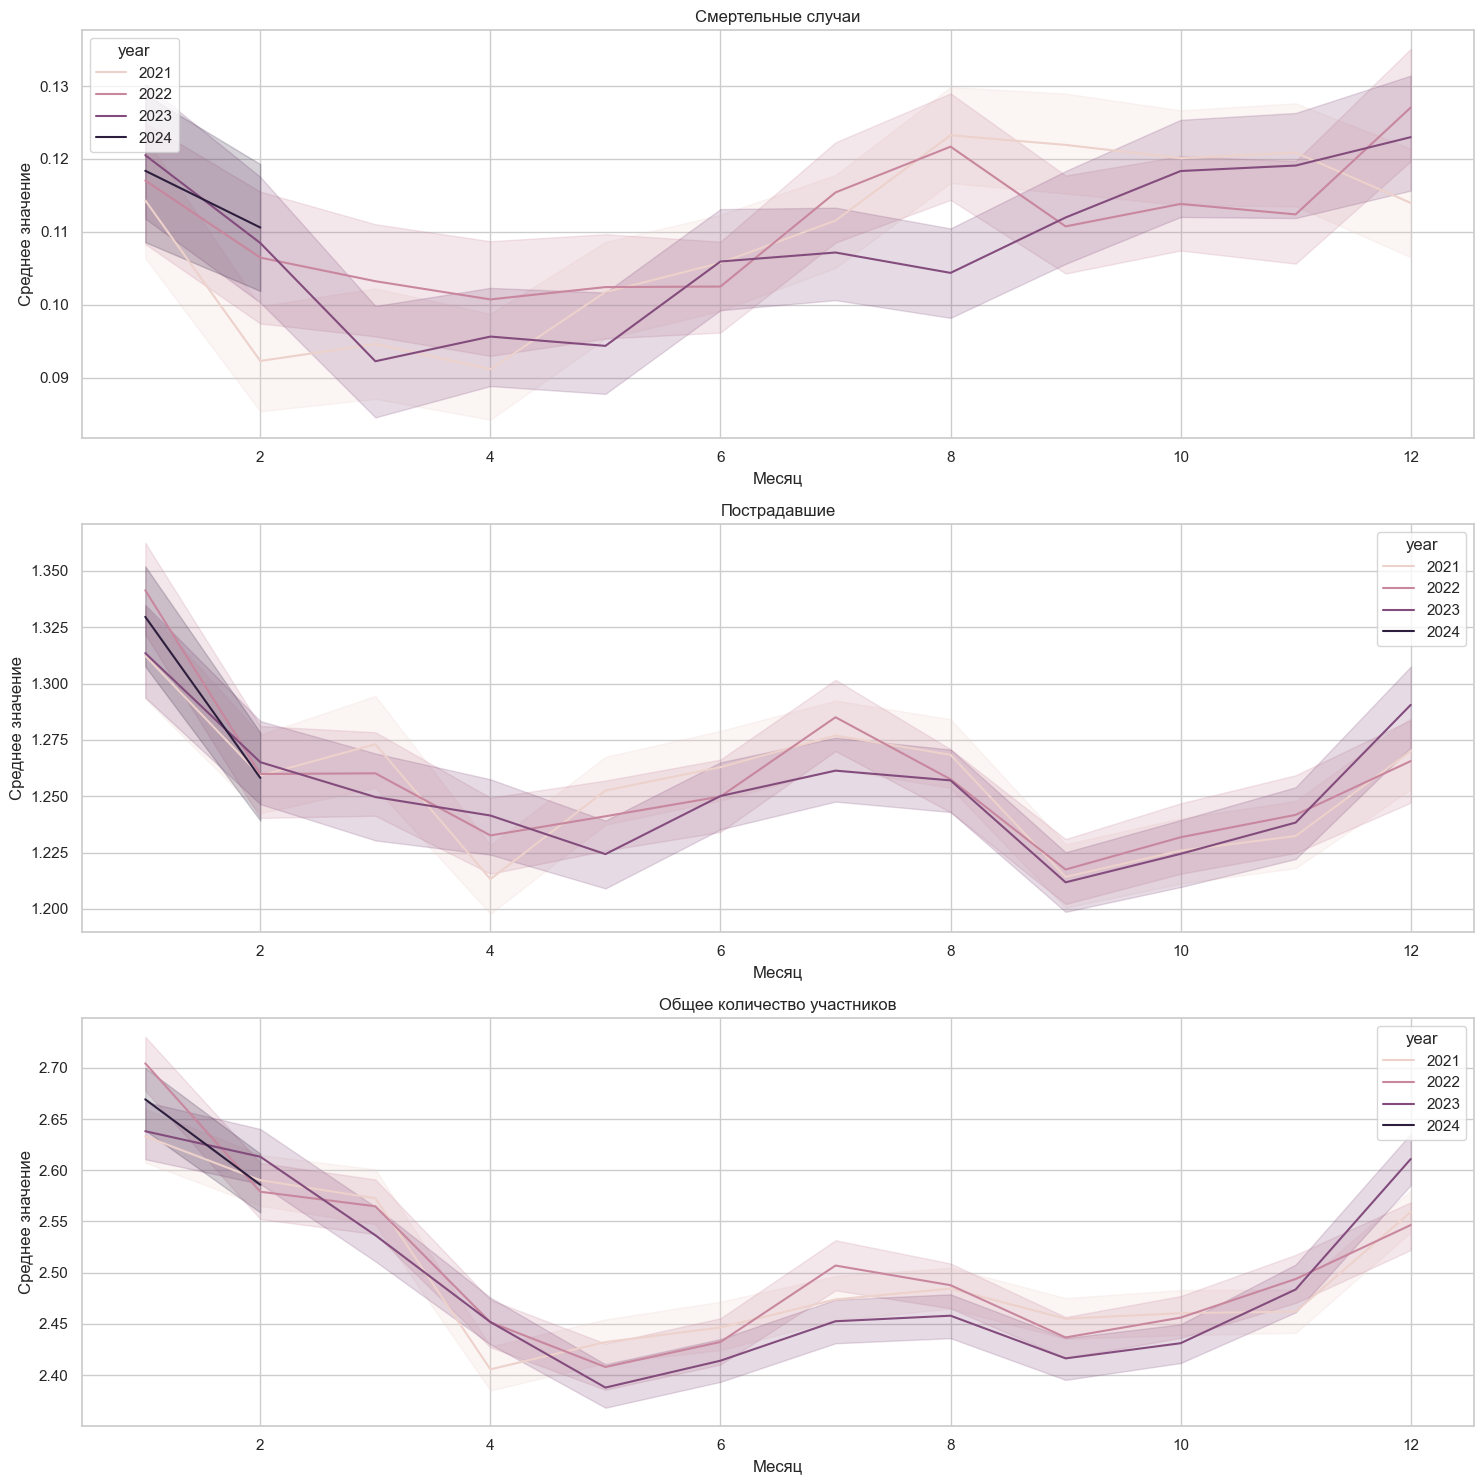

In [72]:
# Создание графиков
plt.figure(figsize=(15, 15))

for i, (column, title) in enumerate(data_to_plot, start=1):
    plt.subplot(3, 1, i)
    sns.lineplot(x='month', y=column, hue='year', data=df[df['year'].isin([2021, 2022, 2023, 2024])])
    plt.title(title)
    plt.xlabel('Месяц')
    plt.ylabel('Среднее значение')

# Улучшение компактности и читаемости графиков
plt.tight_layout()
plt.show()

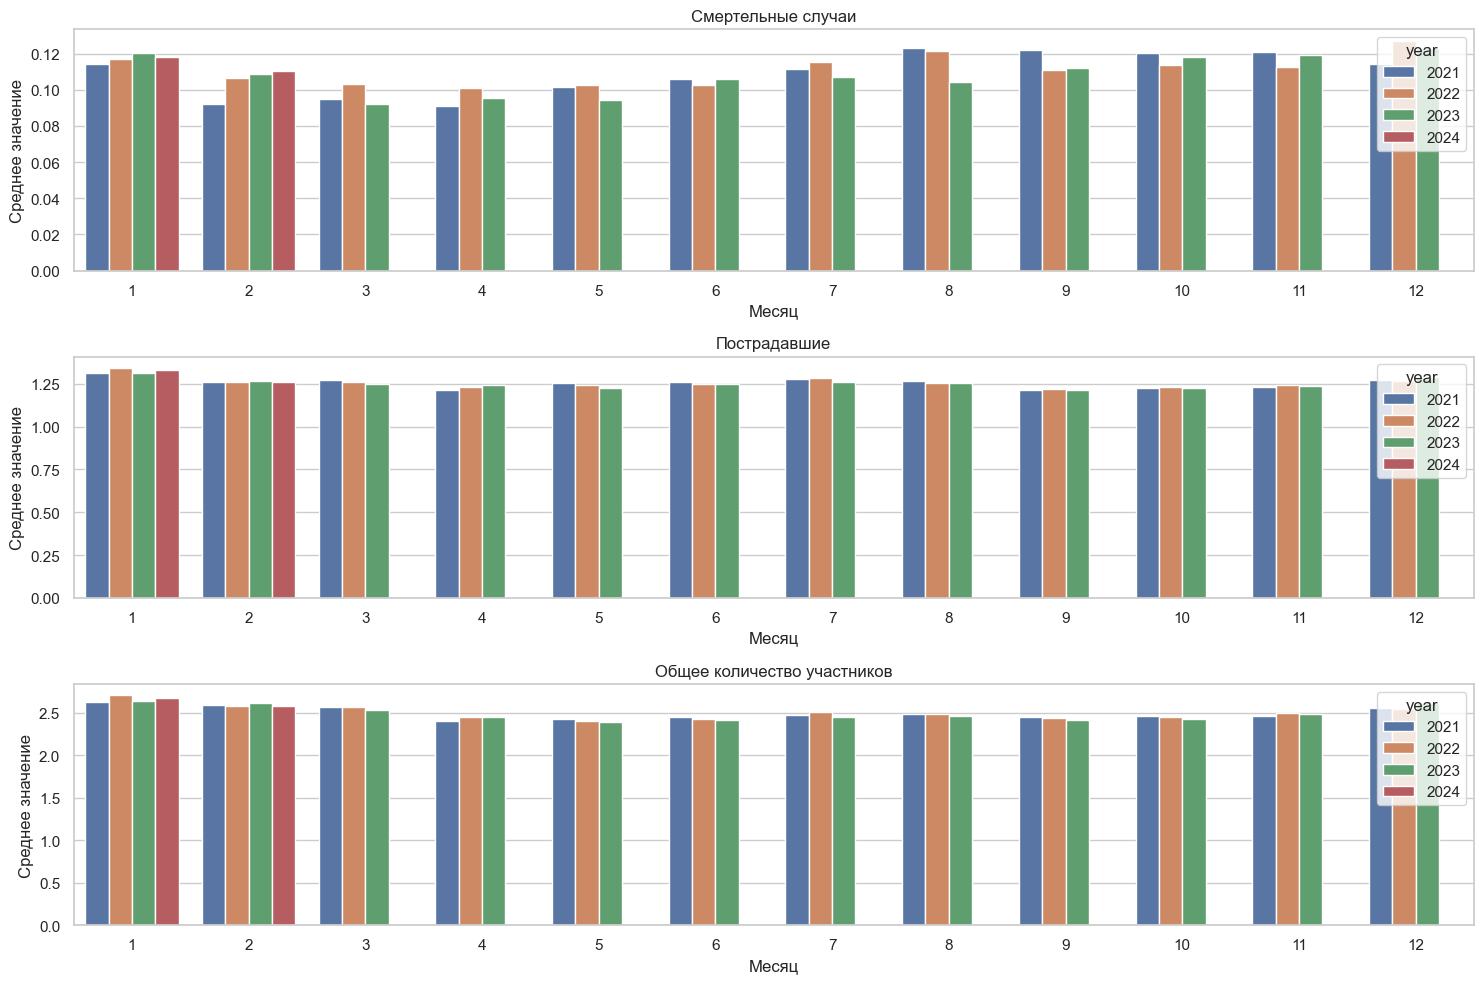

In [73]:
sns.set(style="whitegrid")
data_to_plot = [
    ('dead_count', 'Смертельные случаи'),
    ('injured_count', 'Пострадавшие'),
    ('participants_count', 'Общее количество участников')
]

plt.figure(figsize=(15, 10))

for i, (column, title) in enumerate(data_to_plot, start=1):
    plt.subplot(3, 1, i)
    sns.barplot(x='month', y=column, hue='year', data=df, ci=None)
    plt.title(title)
    plt.xlabel('Месяц')
    plt.ylabel('Среднее значение')

# Улучшение компактности и читаемости графиков
plt.tight_layout()
plt.show()


# Статистическая значимость тренда

Для проверки статистической значимости тренда можем использовать тест Манна-Кендалла, который является непараметрическим тестом на наличие тренда в данных. В этом тесте нулевая гипотеза заключается в отсутствии тренда.

Для проведения теста Манна-Кендалла формулируются следующие гипотезы:

Нулевая гипотеза (H0): Тренд отсутствует, то есть данные не демонстрируют статистически значимого увеличения или уменьшения со временем.

Альтернативная гипотеза (H1): Существует статистически значимый тренд в данных, показывающий увеличение или уменьшение со временем.

Уровень статистической значимости (α): Обычно используется стандартное значение α = 0.05.

Для проведения теста Манна-Кендалла в данном случае мы оцениваем тренд в следующих показателях:

'dead_count': Количество смертельных случаев в ДТП
'injured_count': Количество пострадавших в ДТП
'participants_count': Общее количество участников в ДТП
После проведения теста выводятся значения коэффициента Кендалла (Kendall Tau) и p-значение. Если p-значение меньше уровня статистической значимости (обычно 0.05), то нулевая гипотеза отвергается, и мы можем считать, что существует статистически значимый тренд в данных. Если же p-значение больше уровня статистической значимости, то нулевая гипотеза не отвергается, и тренд отсутствует.

In [74]:
# Функция для проведения теста Манна-Кендалла
def kendall_test(data):
    tau, p_value = kendalltau(data.index, data)
    return tau, p_value

# Тест для столбца 'dead_count'
trend_dead_count, p_value_dead_count = kendall_test(df.groupby('year')['dead_count'].mean())

# Тест для столбца 'injured_count'
trend_injured_count, p_value_injured_count = kendall_test(df.groupby('year')['injured_count'].mean())

# Тест для столбца 'participants_count'
trend_participants_count, p_value_participants_count = kendall_test(df.groupby('year')['participants_count'].mean())

# Вывод результатов
print(f"Trend in 'dead_count': Kendall Tau = {trend_dead_count}, p-value = {p_value_dead_count}")
print(f"Trend in 'injured_count': Kendall Tau = {trend_injured_count}, p-value = {p_value_injured_count}")
print(f"Trend in 'participants_count': Kendall Tau = {trend_participants_count}, p-value = {p_value_participants_count}")


Trend in 'dead_count': Kendall Tau = 0.3333333333333334, p-value = 0.75
Trend in 'injured_count': Kendall Tau = 0.3333333333333334, p-value = 0.75
Trend in 'participants_count': Kendall Tau = 0.3333333333333334, p-value = 0.75



На основании результатов теста Манна-Кендалла можно сделать следующие выводы:

Для показателя 'dead_count' (количество погибших) значение коэффициента Кендалла Tau составляет 0.33, а p-value равно 0.75. Таким образом, на уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу о отсутствии тренда в количестве погибших.

Для показателя 'injured_count' (количество раненных) значение коэффициента Кендалла Tau также составляет 0.33, а p-value равно 0.75. Это означает, что на уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу о отсутствии тренда в количестве раненных.

Для показателя 'participants_count' (общее количество участников) также наблюдается значение коэффициента Кендалла Tau равное 0.33, а p-value составляет 0.75. Это говорит о том, что на уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу о отсутствии тренда в общем количестве участников ДТП.

Таким образом, на основании результатов теста Манна-Кендалла можно сделать вывод о том, что не наблюдается статистически значимого тренда в количестве погибших, раненных и общем количестве участников ДТП за рассматриваемый период времени.


# Гипотезы

                    Гипотеза 1: Влияние времени суток на количество ДТП.
                    
Нулевая гипотеза (H0): Время суток не влияет на количество ДТП.
    
Альтернативная гипотеза (H1): Количество ДТП зависит от времени суток.

Для анализа влияния времени суток на количество пострадавших в ДТП, мы должны использовать соответствующие данные, а затем применять соответствующие статистические методы для анализа зависимостей между ними.

В данном случае, для определения влияния времени суток на количество пострадавших, можно применить тот же самый подход, что и для анализа количества ДТП. Например, можно разделить данные на две группы: ДТП, произошедшие днем, и ДТП, произошедшие ночью. Затем сравнить среднее количество пострадавших в этих двух группах.

In [78]:
# Создание столбца 'time_of_day' на основе часа дня
df['time_of_day'] = df['datetime'].dt.hour.apply(lambda x: 'day' if 6 <= x < 18 else 'night')

# Выбор данных для ДТП, произошедших днем и ночью
daytime_injuries = df[df['time_of_day'] == 'day']['injured_count']
nighttime_injuries = df[df['time_of_day'] == 'night']['injured_count']

# Проведение t-теста для сравнения средних значений
t_stat, p_value = ttest_ind(daytime_injuries, nighttime_injuries, equal_var=False)

# Вывод результатов теста
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Принятие решения на основе уровня значимости (обычно 0.05)
alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: есть статистически значимая разница в средних значениях.")
else:
    print("Не отклоняем нулевую гипотезу: нет статистически значимой разницы в средних значениях.")


T-статистика: 5.011676607296037
P-значение: 5.398590078941413e-07
Отклоняем нулевую гипотезу: есть статистически значимая разница в средних значениях.


Полученные результаты указывают на то, что есть статистически значимая разница в средних значениях количества пострадавших в ДТП, произошедших днем и ночью. Уровень значимости (P-значение) составляет 5.398590078941413e-07, что намного меньше стандартного порогового значения 0.05. Таким образом, у нас есть достаточно сильные доказательства для отклонения нулевой гипотезы о том, что время суток не влияет на количество пострадавших в ДТП.

                             Гипотеза 2: Различия в распределении ДТП в разных регионах.

Нулевая гипотеза (H0): Распределение ДТП одинаково во всех регионах.

Альтернативная гипотеза (H1): Существуют различия в распределении ДТП между регионами.


In [79]:
# Создайте отдельные выборки для каждого региона
regions = df['region'].unique()
data_by_region = [df[df['region'] == reg]['participants_count'] for reg in regions]

# Проведите дисперсионный анализ (ANOVA)
f_statistic, p_value = f_oneway(*data_by_region)

# Выведите результаты
print("F-статистика:", f_statistic)
print("P-значение:", p_value)

# Оценка статистической значимости
alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: существуют различия в распределении ДТП между регионами.")
else:
    print("Не отклоняем нулевую гипотезу: распределение ДТП одинаково во всех регионах.")

F-статистика: 3.826127832298098
P-значение: 0.0
Отклоняем нулевую гипотезу: существуют различия в распределении ДТП между регионами.


Исходя из результатов проведенного теста, можно сделать следующие выводы:

Уровень значимости (P-значение) составляет 0.0, что намного меньше стандартного порогового значения 0.05. Это означает, что у нас есть достаточно сильные доказательства для отклонения нулевой гипотезы о том, что распределение ДТП одинаково во всех регионах.

F-статистика равна 3.826127832298098, что также указывает на существенные различия в распределении ДТП между регионами.

Таким образом, на основании результатов теста мы можем с уверенностью отвергнуть нулевую гипотезу и сделать вывод о том, что существуют статистически значимые различия в распределении ДТП между регионами.

                           Гипотеза 3: Влияние погодных условий на типы ДТП.

Нулевая гипотеза (H0): Типы ДТП не зависят от погодных условий.

Альтернативная гипотеза (H1): Некоторые типы ДТП более вероятны при определенных погодных условиях.

Для проверки данной гипотезы можно воспользоваться методом Хи-квадрат, который позволяет определить наличие статистически значимой связи между двумя категориальными переменными. В данном случае категориальными переменными будут типы ДТП и погодные условия.

In [80]:
# Создание таблицы сопряженности для типов ДТП и погодных условий
contingency_table = pd.crosstab(df['category'], df['weather'])

# Проведение теста Хи-квадрат
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Вывод результатов
print("Хи-квадрат статистика:", chi2_stat)
print("P-значение:", p_val)

# Оценка статистической значимости
alpha = 0.05
if p_val < alpha:
    print("Отклоняем нулевую гипотезу: некоторые типы ДТП зависят от погодных условий.")
else:
    print("Принимаем нулевую гипотезу: типы ДТП не зависят от погодных условий.")

Хи-квадрат статистика: 9595.467061553476
P-значение: 0.0
Отклоняем нулевую гипотезу: некоторые типы ДТП зависят от погодных условий.


Исходя из результатов теста, можно сделать следующие выводы:

Уровень значимости (P-значение) составляет 0.0, что намного меньше стандартного порогового значения 0.05. Это означает, что у нас есть достаточно сильные доказательства для отклонения нулевой гипотезы о том, что типы ДТП не зависят от погодных условий.

Хи-квадрат статистика равна 9595.467061553476, что также указывает на существенную связь между типами ДТП и погодными условиями.

Таким образом, на основании результатов теста мы можем с уверенностью отклонить нулевую гипотезу и сделать вывод о том, что некоторые типы ДТП зависят от погодных условий.

                         Зависимость тяжести ДТП от погодных условий

In [81]:
# Создаем таблицу сопряженности
contingency_table = pd.crosstab(df['category'], df['weather'])

# Проводим тест Хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Вывод результатов теста
print("Хи-квадрат статистика:", chi2)
print("p-значение:", p)
print("Степени свободы:", dof)
print("Ожидаемые частоты:", expected)

Хи-квадрат статистика: 9595.467061553476
p-значение: 0.0
Степени свободы: 2460
Ожидаемые частоты: [[6.45933073e-02 6.58851735e+00 1.29186615e-01 ... 1.35645945e+00
  1.16267953e+00 1.58024943e+04]
 [1.74136532e-03 1.77619263e-01 3.48273064e-03 ... 3.65686717e-02
  3.13445757e-02 4.26018060e+02]
 [2.94946834e-02 3.00845771e+00 5.89893668e-02 ... 6.19388352e-01
  5.30904301e-01 7.21575632e+03]
 ...
 [1.03593971e-04 1.05665850e-02 2.07187942e-04 ... 2.17547339e-03
  1.86469147e-03 2.53438506e+01]
 [3.45313236e-04 3.52219501e-02 6.90626472e-04 ... 7.25157796e-03
  6.21563825e-03 8.44795020e+01]
 [1.99788372e-04 2.03784140e-02 3.99576745e-04 ... 4.19555582e-03
  3.59619070e-03 4.88774261e+01]]


Полученные результаты указывают на то, что существует статистически значимая связь между типами ДТП и погодными условиями. Значение p-значения равно нулю, что говорит о том, что нулевая гипотеза о независимости типов ДТП от погодных условий отвергается на уровне значимости 0.05.

Статистика Хи-квадрат достаточно высока (9595.47), а это говорит о том, что наблюдаемые частоты сильно отличаются от ожидаемых, что также подтверждает наличие взаимосвязи между типами ДТП и погодными условиями.

Ожидаемые частоты показывают, какие значения были бы в каждой ячейке таблицы сопряженности, если бы наблюдаемые частоты были бы случайными и не зависели от типов ДТП и погодных условий.

                                        Выводы по гипотезам

Исходя из результатов проведенных статистических тестов, можно сделать следующие выводы:

- Влияние времени суток на количество ДТП: Полученные результаты позволяют уверенно отклонить нулевую гипотезу о том, что время суток не влияет на количество ДТП. Уровень значимости (P-значение) составляет 5.398590078941413e-07, что значительно меньше стандартного порогового значения 0.05. Таким образом, у нас есть достаточно сильные доказательства для отклонения этой гипотезы.

- Влияние региона на распределение ДТП: Результаты теста также позволяют отвергнуть нулевую гипотезу о том, что распределение ДТП одинаково во всех регионах. Уровень значимости (P-значение) составляет 0.0, что снова намного меньше стандартного порогового значения 0.05. Это указывает на существенные различия в распределении ДТП между регионами.

- Влияние погодных условий на типы ДТП: Статистические тесты также подтверждают наличие связи между типами ДТП и погодными условиями. Нулевая гипотеза о независимости типов ДТП от погодных условий отвергается на уровне значимости 0.05. Это подтверждается как низким значением p-значения, равным нулю, так и высокой статистикой Хи-квадрат (9595.47), указывающей на значительное отличие наблюдаемых частот от ожидаемых.

В целом, полученные результаты свидетельствуют о важности учета времени суток, региона и погодных условий при анализе и прогнозировании ДТП. Эти факторы оказывают значительное влияние на вероятность возникновения ДТП и их характеристики, что подчеркивает важность их учета при разработке мер по повышению безопасности на дорогах.

                                            Выводы:
                                            
Из анализа предоставленных данных о дорожно-транспортных происшествиях можно сделать следующие общие выводы:

- Характеристики происшествий:

Большинство происшествий относится к категории "Дорожно-транспортные происшествия", что подтверждает их доминирующую роль в статистике.
Наибольшее количество ДТП происходит в светлое время суток.
Жилые дома индивидуальной застройки и многоквартирные жилые дома часто встречаются вблизи происшествий, что может указывать на причастность жилых зон к ДТП.
Регионы с наибольшим количеством происшествий: Нижний Новгород, Тюмень, Омск, Уфа и Казань.
Погодные условия "Ясно" и "Пасмурно" наиболее распространены во время происшествий.


- Транспортные средства:

Самые частые годы производства транспортных средств: 2008, 2012 и 2011.
Самые распространенные марки автомобилей: ВАЗ, Toyota, Hyundai и Kia.
Наиболее часто попадают в ДТП: автомобили марки Granta (Гранта).
Белые автомобили подвержены большему количеству происшествий.
Большинство происшествий связано с легковыми автомобилями.


- Участники ДТП:

Процент происшествий с выпившими водителями составляет около 11.47%.
Женщины составляют существенную часть участников ДТП.
Большинство происшествий не содержат информации о нарушениях или состоянии здоровья участников.
Пешеходы часто являются наиболее уязвимыми участниками дорожного движения.


- Характеристики происшествий:

Столкновения - самая распространенная категория происшествий.
Большинство происшествий характеризуются как легкие.
Наибольшее количество происшествий приходится на месяц август.
Обобщенно, анализ данных позволяет увидеть основные тенденции и характеристики дорожно-транспортных происшествий, что может быть полезным для разработки мер по повышению безопасности на дорогах и оптимизации транспортной инфраструктуры.